In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import math
import tensorflow as tf

In [ ]:
# MONTAR DRIVE
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Ficheros csv base
url_pep = '/content/drive/Shareddrives/TFGs - asun.mayoral@umh.es/INMA RAMÍREZ 23-24/train_peptides_limpio.csv'
url_clin = '/content/drive/Shareddrives/TFGs - asun.mayoral@umh.es/INMA RAMÍREZ 23-24/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv'
url_prot = '/content/drive/Shareddrives/TFGs - asun.mayoral@umh.es/INMA RAMÍREZ 23-24/amp-parkinsons-disease-progression-prediction/train_proteins.csv'

train_peptides = pd.read_csv(url_pep)
train_clinical_data = pd.read_csv(url_clin)
train_proteins = pd.read_csv(url_prot)


In [ ]:
url1="https://raw.githubusercontent.com/irl01-umh/TFG/main/train_peptides_limpio.csv"
url2="https://raw.githubusercontent.com/irl01-umh/TFG/main/train_proteins.csv"
url3="https://raw.githubusercontent.com/irl01-umh/TFG/main/train_clinical_data.csv"
#Carga de train_peptides.csv, train_proteins.csv y train_clinical_data.csv
train_peptides = pd.read_csv(url1)
train_peptides.head()

train_proteins = pd.read_csv(url2)
train_proteins.head()

train_clinical_data = pd.read_csv(url3)
train_clinical_data.head()

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0     55_0          55            0     10.0      6.0     15.0      NaN   
1     55_3          55            3     10.0      7.0     25.0      NaN   
2     55_6          55            6      8.0     10.0     34.0      NaN   
3     55_9          55            9      8.0      9.0     30.0      0.0   
4    55_12          55           12     10.0     10.0     41.0      0.0   

  upd23b_clinical_state_on_medication  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                  On  
4                                  On

# Descripción de Clinical

- Distribución valores faltantes
- perfiles por paciente de la evolución del updrs_x con el mes de seguimiento (para cada x)
- muestra, para un paciente, de la evolución de las cuatro medidas de updrs con el mes, visualizadas en el mismo gráfico (para comparar mediciones updrs_x versus x)
- !!!!! he añadido un grafico que compara la puntuación de cada updrs a lo largo de los meses, segun si el paciente toma o no medicación

Con los datos pivotados
- distribución de cada updrs_x por mes (boxplot) para cada x: hecho

In [ ]:
train_clinical_data.columns
train_clinical_data.head()

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0     55_0          55            0     10.0      6.0     15.0      NaN   
1     55_3          55            3     10.0      7.0     25.0      NaN   
2     55_6          55            6      8.0     10.0     34.0      NaN   
3     55_9          55            9      8.0      9.0     30.0      0.0   
4    55_12          55           12     10.0     10.0     41.0      0.0   

  upd23b_clinical_state_on_medication  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                  On  
4                                  On

In [ ]:
datos['variable'].mean()

In [ ]:
#pivotado de la base de datos para tener una columna con la parte medida en updrs
# y otra con la medición
train_long=pd.wide_to_long(train_clinical_data,stubnames = 'updrs_',
                 i='visit_id',j='updrs_part')
train_long = train_long.reset_index()
train_long.head()


visit_id  updrs_part  visit_month upd23b_clinical_state_on_medication  \
0     55_0           1            0                                 NaN   
1     55_3           1            3                                 NaN   
2     55_6           1            6                                 NaN   
3     55_9           1            9                                  On   
4    55_12           1           12                                  On   

   patient_id  updrs_  
0          55    10.0  
1          55    10.0  
2          55     8.0  
3          55     8.0  
4          55    10.0

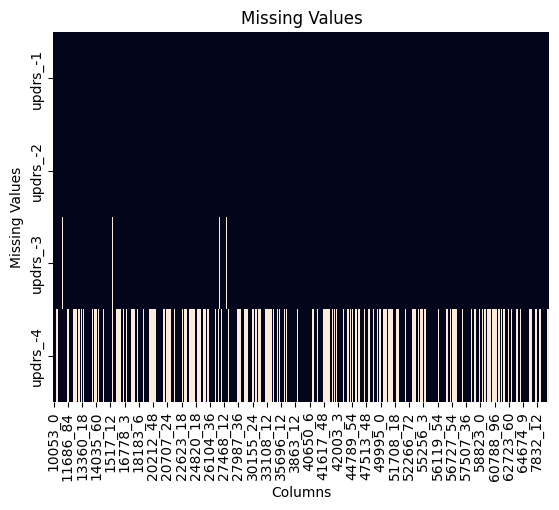

In [ ]:
# valores faltantes
# Promedios por visit_id
tabla=pd.pivot_table(train_long,index=['visit_id'],values=['updrs_'],columns=['updrs_part'],aggfunc='mean')
# heatmap for missing values
ax = plt.axes()
sns.heatmap(tabla.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

In [ ]:
tabla.isnull().sum().unique()

array([   1,    2,   25, 1038])

In [ ]:
datos = train_long
datos.columns
datos.head()

visit_id  updrs_part  visit_month upd23b_clinical_state_on_medication  \
0     55_0           1            0                                 NaN   
1     55_3           1            3                                 NaN   
2     55_6           1            6                                 NaN   
3     55_9           1            9                                  On   
4    55_12           1           12                                  On   

   patient_id  updrs_  
0          55    10.0  
1          55    10.0  
2          55     8.0  
3          55     8.0  
4          55    10.0

<ipython-input-8-eebc1b66fd89>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_1', hue='patient_id', ci=None);
<ipython-input-8-eebc1b66fd89>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_2', hue='patient_id', ci=None);
<ipython-input-8-eebc1b66fd89>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_3', hue='patient_id', ci=None);
<ipython-input-8-eebc1b66fd89>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_4', hue='patient_id', ci=None);


Text(0.5, 1.0, 'Distribución del updrs_4')

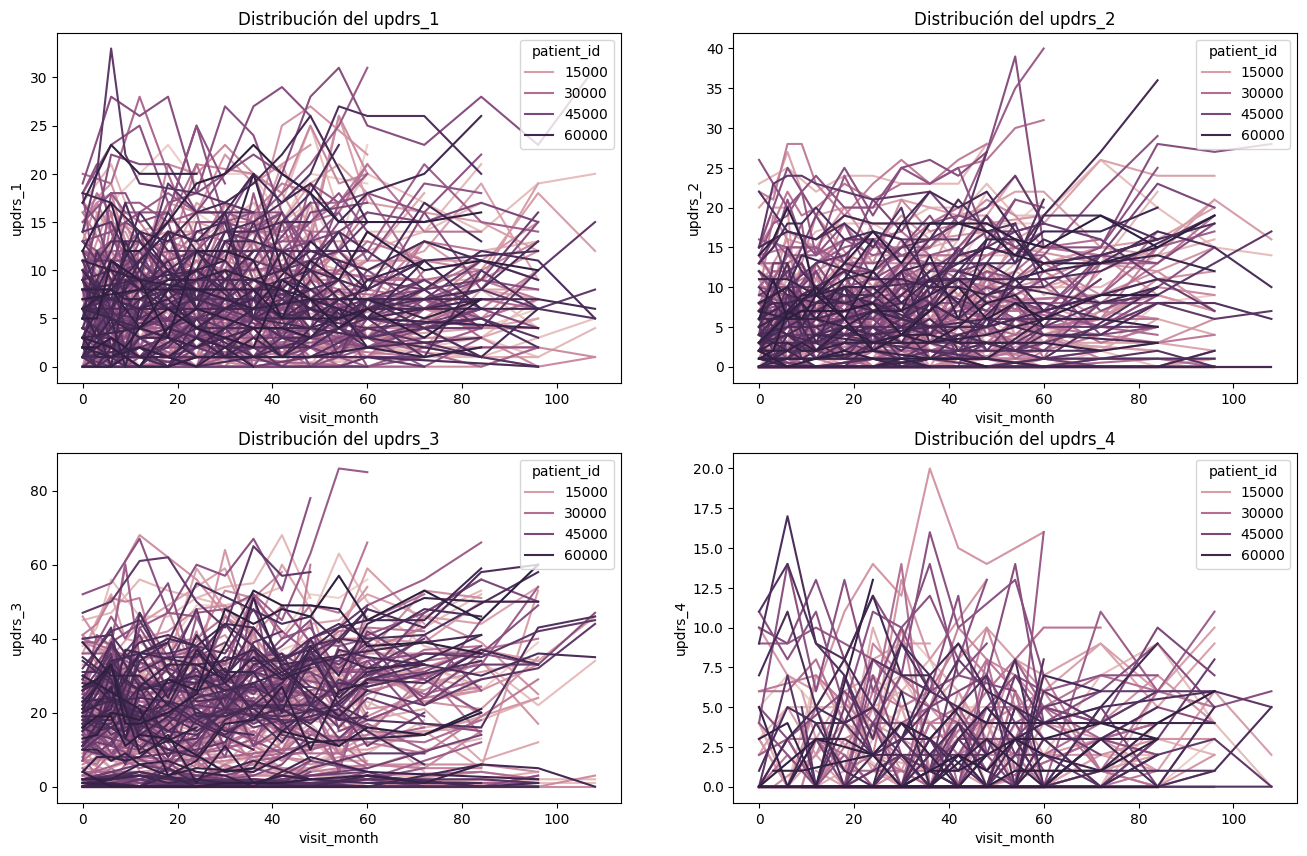

In [ ]:
# Distribución por mes updrs 1

datos = train_long
partes = datos['updrs_part'].unique()
part = partes[0]
plt.figure(figsize=[16,10])

plt.subplot(2,2,1)
g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_1', hue='patient_id', ci=None);
g.set_title(f'Distribución del updrs_{partes[0]}')

plt.subplot(2,2,2)
g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_2', hue='patient_id', ci=None);
g.set_title(f'Distribución del updrs_{partes[1]}')

plt.subplot(2,2,3)
g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_3', hue='patient_id', ci=None);
g.set_title(f'Distribución del updrs_{partes[2]}')

plt.subplot(2,2,4)
g = sns.lineplot(data=train_clinical_data, x='visit_month', y='updrs_4', hue='patient_id', ci=None);
g.set_title(f'Distribución del updrs_{partes[3]}')

<ipython-input-22-ac5615563b07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mes_0_data['updrs_sum'] = mes_0_data['updrs_1'] + mes_0_data['updrs_2'] + mes_0_data['updrs_3'] + mes_0_data['updrs_4']


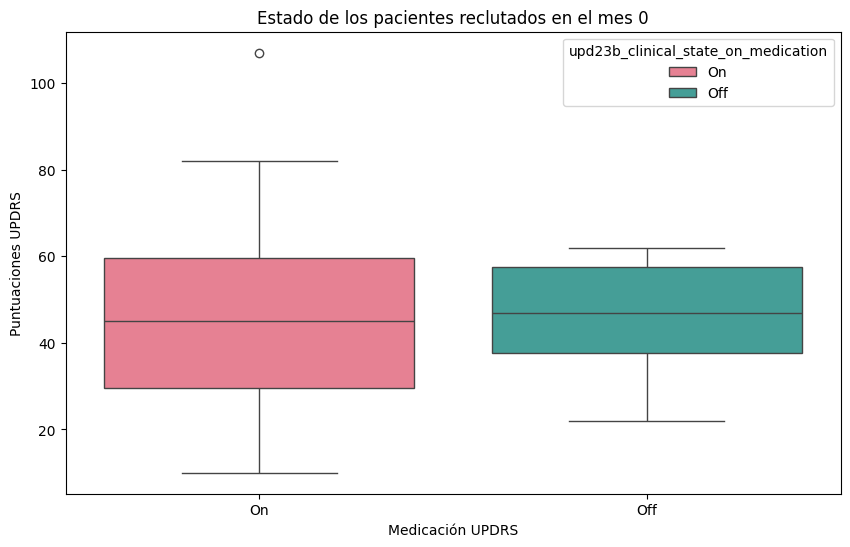

In [ ]:

# Filtrar los datos para el mes 0
mes_0_data = train_clinical_data[train_clinical_data['visit_month'] == 0]
mes_0_data['updrs_sum'] = mes_0_data['updrs_1'] + mes_0_data['updrs_2'] + mes_0_data['updrs_3'] + mes_0_data['updrs_4']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mes_0_data, x='upd23b_clinical_state_on_medication', y='updrs_sum', hue='upd23b_clinical_state_on_medication',palette='husl')
plt.title('Estado de los pacientes reclutados en el mes 0')
plt.xlabel('Medicación UPDRS')
plt.ylabel('Puntuaciones UPDRS')
plt.show()

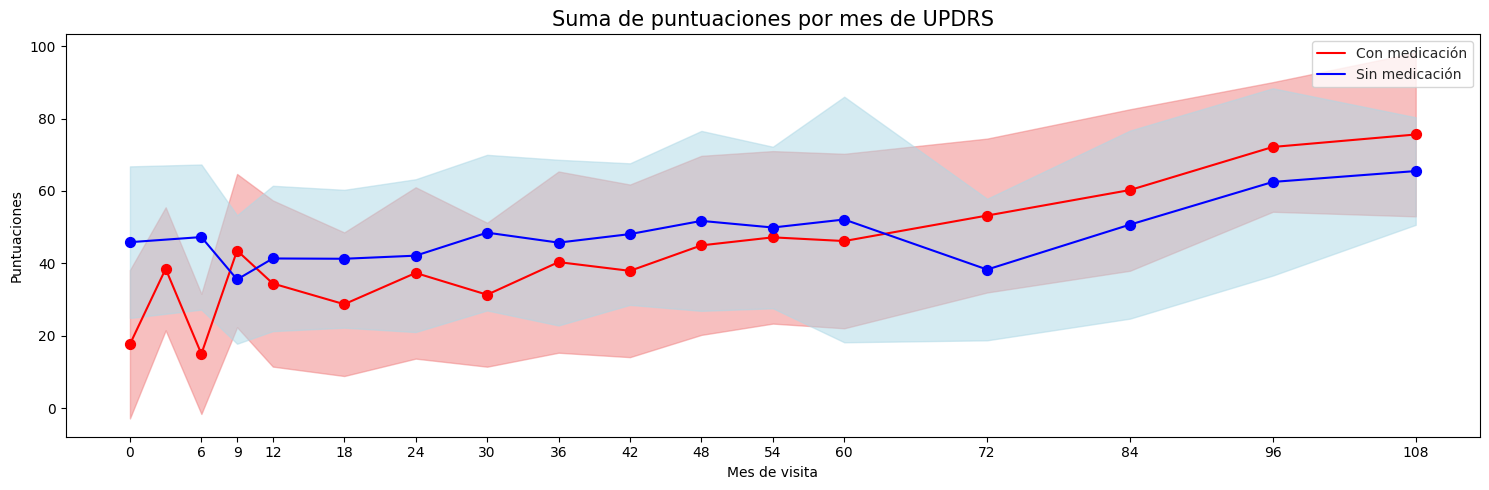

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]

train_clinical_data_copy = train_clinical_data.copy()
train_clinical_data_copy["upd23b_clinical_state_on_medication"] = train_clinical_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.set_style('whitegrid')

data_on = train_clinical_data_copy[train_clinical_data_copy["upd23b_clinical_state_on_medication"] == "Off"]

mean_on = data_on.groupby("visit_month")["updrs_sum"].mean()
std_on = data_on.groupby("visit_month")["updrs_sum"].std()

ax.plot(mean_on.index, mean_on.values, color='red', label="Con medicación")
ax.fill_between(mean_on.index, mean_on - std_on, mean_on + std_on, color='lightcoral', alpha=0.5)
ax.scatter(mean_on.index, mean_on.values, color='red', s=50, zorder=5)

data_off = train_clinical_data_copy[train_clinical_data_copy["upd23b_clinical_state_on_medication"] == "On"]

mean_off = data_off.groupby("visit_month")["updrs_sum"].mean()
std_off = data_off.groupby("visit_month")["updrs_sum"].std()

ax.plot(mean_off.index, mean_off.values, color='blue', label="Sin medicación")
ax.fill_between(mean_off.index, mean_off - std_off, mean_off + std_off, color='lightblue', alpha=0.5)
ax.scatter(mean_off.index, mean_off.values, color='blue', s=50, zorder=5)

ax.set_title("Suma de puntuaciones por mes de UPDRS", fontsize=15)
ax.set_xlabel("Mes de visita")
ax.set_ylabel("Puntuaciones")
ax.set_xticks(mean_off.index)

plt.legend()
plt.tight_layout()
plt.show()



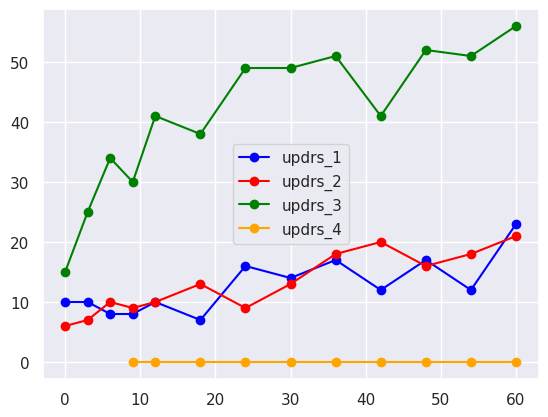

In [ ]:
# Evolucion paciente 55 por mes y updrs

plot_df = train_clinical_data[train_clinical_data["patient_id"]==55]
fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], marker='o', color="blue", label="updrs_1", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], marker='o', color="red", label="updrs_2", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], marker='o', color="green", label="updrs_3", linestyle="-")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], marker='o', color="orange", label="updrs_4", linestyle="-")

ax.legend()
plt.show()

<ipython-input-7-f2041aafbb46>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[f'updrs_{j+1}_divided'] = plot_df[f'updrs_{j+1}'] / divisor
<ipython-input-7-f2041aafbb46>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[f'updrs_{j+1}_divided'] = plot_df[f'updrs_{j+1}'] / divisor
<ipython-input-7-f2041aafbb46>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

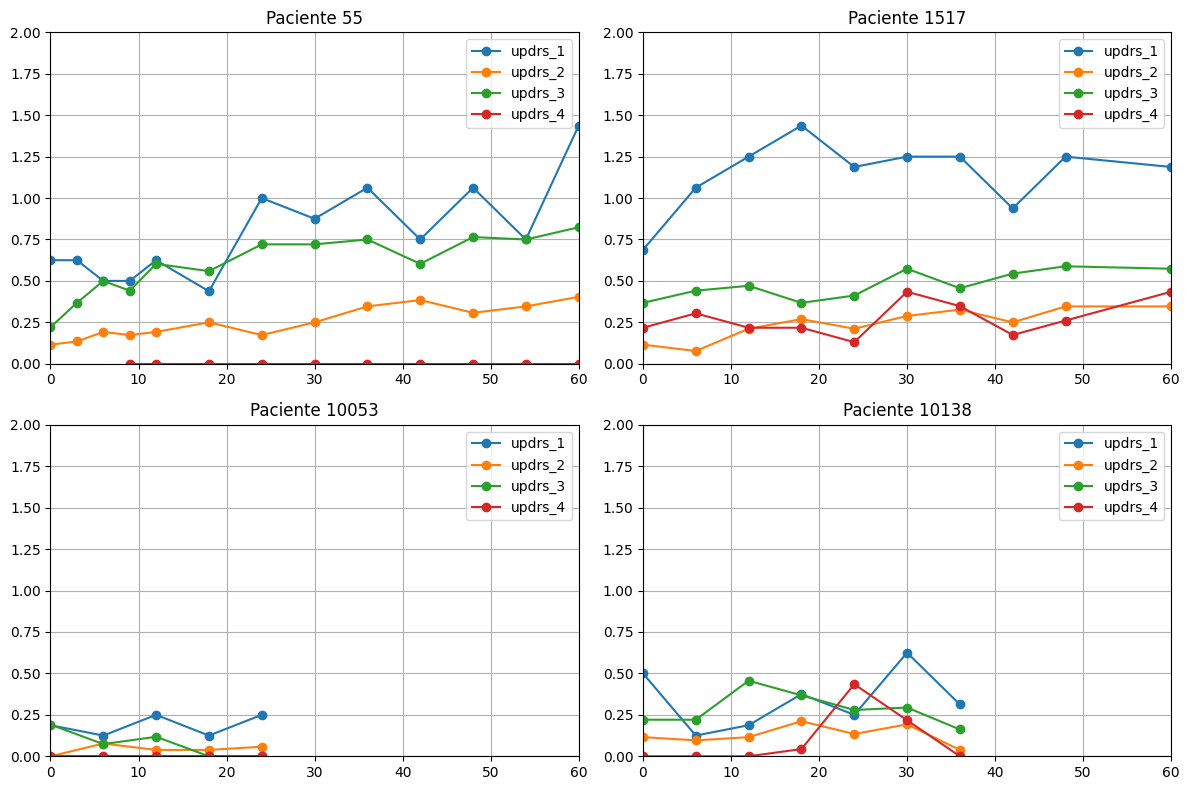

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de divisores y preparación de datos
divisors = [16, 52, 68, 23]

# Suponiendo que train_clinical_data ya está cargado y contiene los datos necesarios
train_clinical_data["updrs_sum"] = train_clinical_data[[f'updrs_{i}' for i in range(1, 5)]].sum(axis=1)
train_clinical_data_copy = train_clinical_data.copy()
train_clinical_data_copy["upd23b_clinical_state_on_medication"] = train_clinical_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

# Selección de los datos por paciente
plot_df1 = train_clinical_data[train_clinical_data["patient_id"] == 55]
plot_df2 = train_clinical_data[train_clinical_data["patient_id"] == 1517]
plot_df3 = train_clinical_data[train_clinical_data["patient_id"] == 10053]
plot_df4 = train_clinical_data[train_clinical_data["patient_id"] == 10138]

# Preparación del gráfico
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Establecer los límites de los ejes
x_limits = (0, 60)
y_limits = (0, 2)

# Plotting para cada paciente
for i, plot_df in enumerate([plot_df1, plot_df2, plot_df3, plot_df4]):
    row = i // 2
    col = i % 2

    for j, divisor in enumerate(divisors):
        plot_df[f'updrs_{j+1}_divided'] = plot_df[f'updrs_{j+1}'] / divisor

    plot_df['updrs_sum_divided'] = plot_df[[f'updrs_{j+1}_divided' for j in range(4)]].sum(axis=1)

    for j in range(4):
        axs[row, col].plot(plot_df['visit_month'], plot_df[f'updrs_{j+1}_divided'], marker='o', label=f'updrs_{j+1}')

    axs[row, col].legend()
    axs[row, col].set_title(f'Paciente {plot_df["patient_id"].iloc[0]}')

    # Fijar límites de los ejes
    axs[row, col].set_xlim(x_limits)
    axs[row, col].set_ylim(y_limits)
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


ValueError: Axis limits cannot be NaN or Inf

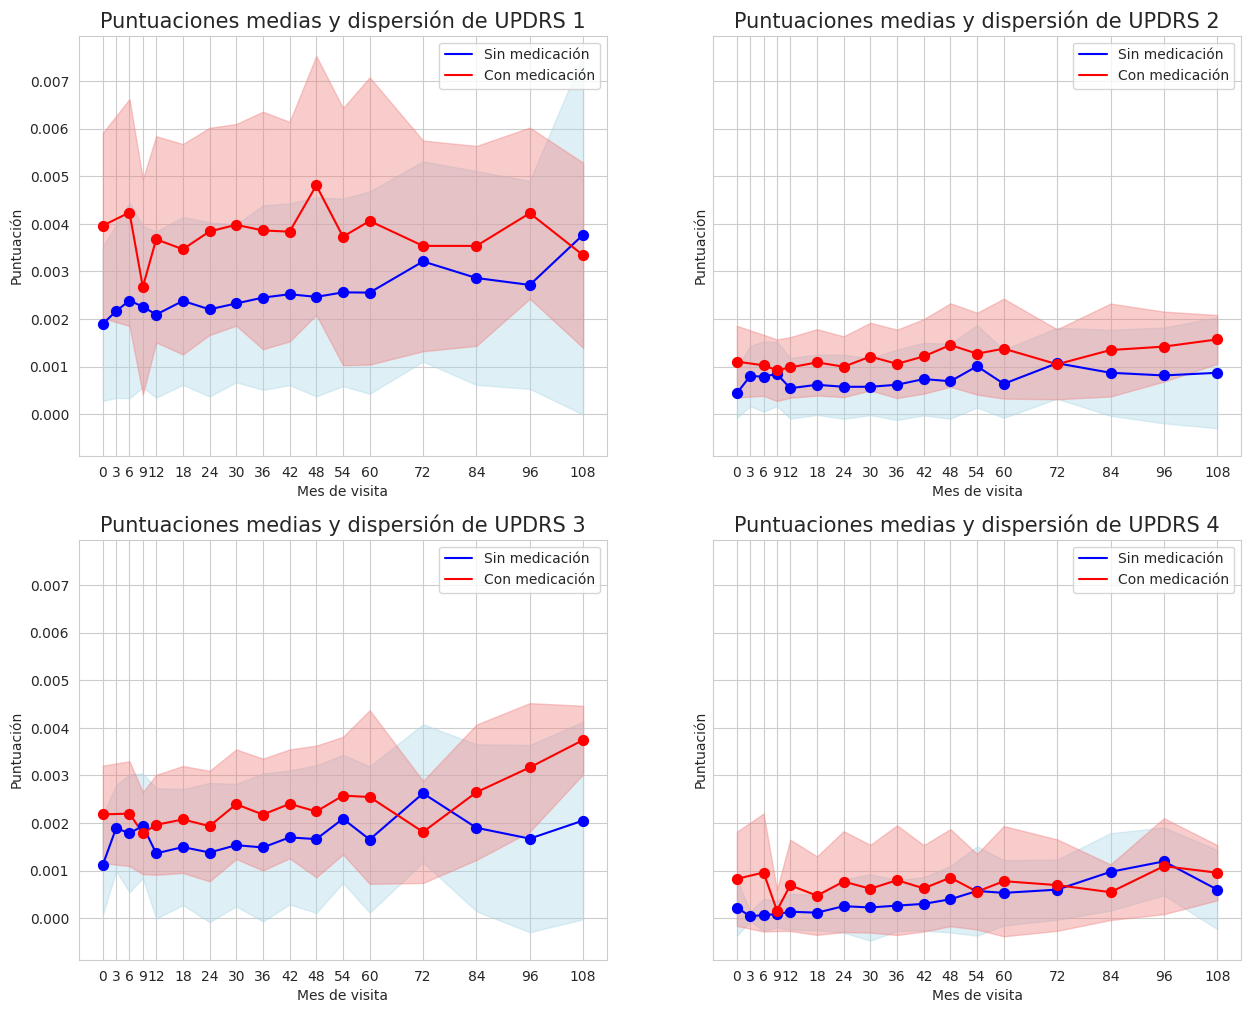

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_clinical_data_copy = train_clinical_data.copy()
train_clinical_data_copy["upd23b_clinical_state_on_medication"] = train_clinical_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), sharey=True)
sns.set_style('whitegrid')
paletas = ['husl', 'deep', 'Set2', 'pastel']
axs = axs.flatten()

divisors = [16, 52, 68, 23]
global_divisor = 159

total_scores = []

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]

    data_off = train_clinical_data_copy[train_clinical_data_copy["upd23b_clinical_state_on_medication"] == "Off"]
    mean_off = data_off.groupby("visit_month")[feature].mean() / divisors[x]
    std_off = data_off.groupby("visit_month")[feature].std() / divisors[x]

    data_on = train_clinical_data_copy[train_clinical_data_copy["upd23b_clinical_state_on_medication"] == "On"]
    mean_on = data_on.groupby("visit_month")[feature].mean() / divisors[x]
    std_on = data_on.groupby("visit_month")[feature].std() / divisors[x]

    total_score_off = mean_off + mean_on
    total_scores.append(total_score_off)

    ax.plot(mean_off.index, mean_off.values / global_divisor, color='blue', label="Sin medicación")
    ax.fill_between(mean_off.index, (mean_off - std_off) / global_divisor, (mean_off + std_off) / global_divisor, color='lightblue', alpha=0.4)  # Cambiar el alpha para hacerlo más visible
    ax.scatter(mean_off.index, mean_off.values / global_divisor, color='blue', s=50, zorder=5)

    ax.plot(mean_on.index, mean_on.values / global_divisor, color='red', label="Con medicación")
    ax.fill_between(mean_on.index, (mean_on - std_on) / global_divisor, (mean_on + std_on) / global_divisor, color='lightcoral', alpha=0.4)  # Cambiar el alpha para hacerlo más visible
    ax.scatter(mean_on.index, mean_on.values / global_divisor, color='red', s=50, zorder=5)

    ax.set_title("Puntuaciones medias y dispersión de UPDRS {}".format(x+1), fontsize=15)
    ax.set_xlabel("Mes de visita")
    ax.set_ylabel("Puntuación".format(global_divisor))
    ax.set_xticks(mean_off.index)
    ax.legend()

total_scores = np.sum(total_scores, axis=0)

total_scores_series = pd.Series(total_scores, index=mean_off.index)

for ax in axs:
    ax.set_ylim(0, np.max(total_scores_series.values / global_divisor) + 5)
plt.figure()
plt.plot(total_scores_series.index, total_scores_series.values / global_divisor, color='green', label="Suma total")
plt.title("Suma total de las puntuaciones de UPDRS por mes", fontsize=15)
plt.xlabel("Mes de visita")
plt.ylabel("Puntuación".format(global_divisor))
plt.xticks(total_scores_series.index)
plt.legend()
plt.show()


<ipython-input-33-b0201d8e02d0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="visit_month", y=feature, ax=ax, palette=paletas[x])
<ipython-input-33-b0201d8e02d0>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, ax=ax)
<ipython-input-33-b0201d8e02d0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="visit_month", y=feature, ax=ax, palette=paletas[x])
<ipython-input-33-b0201d8e02d0>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x="visit_month", y=feature, color="

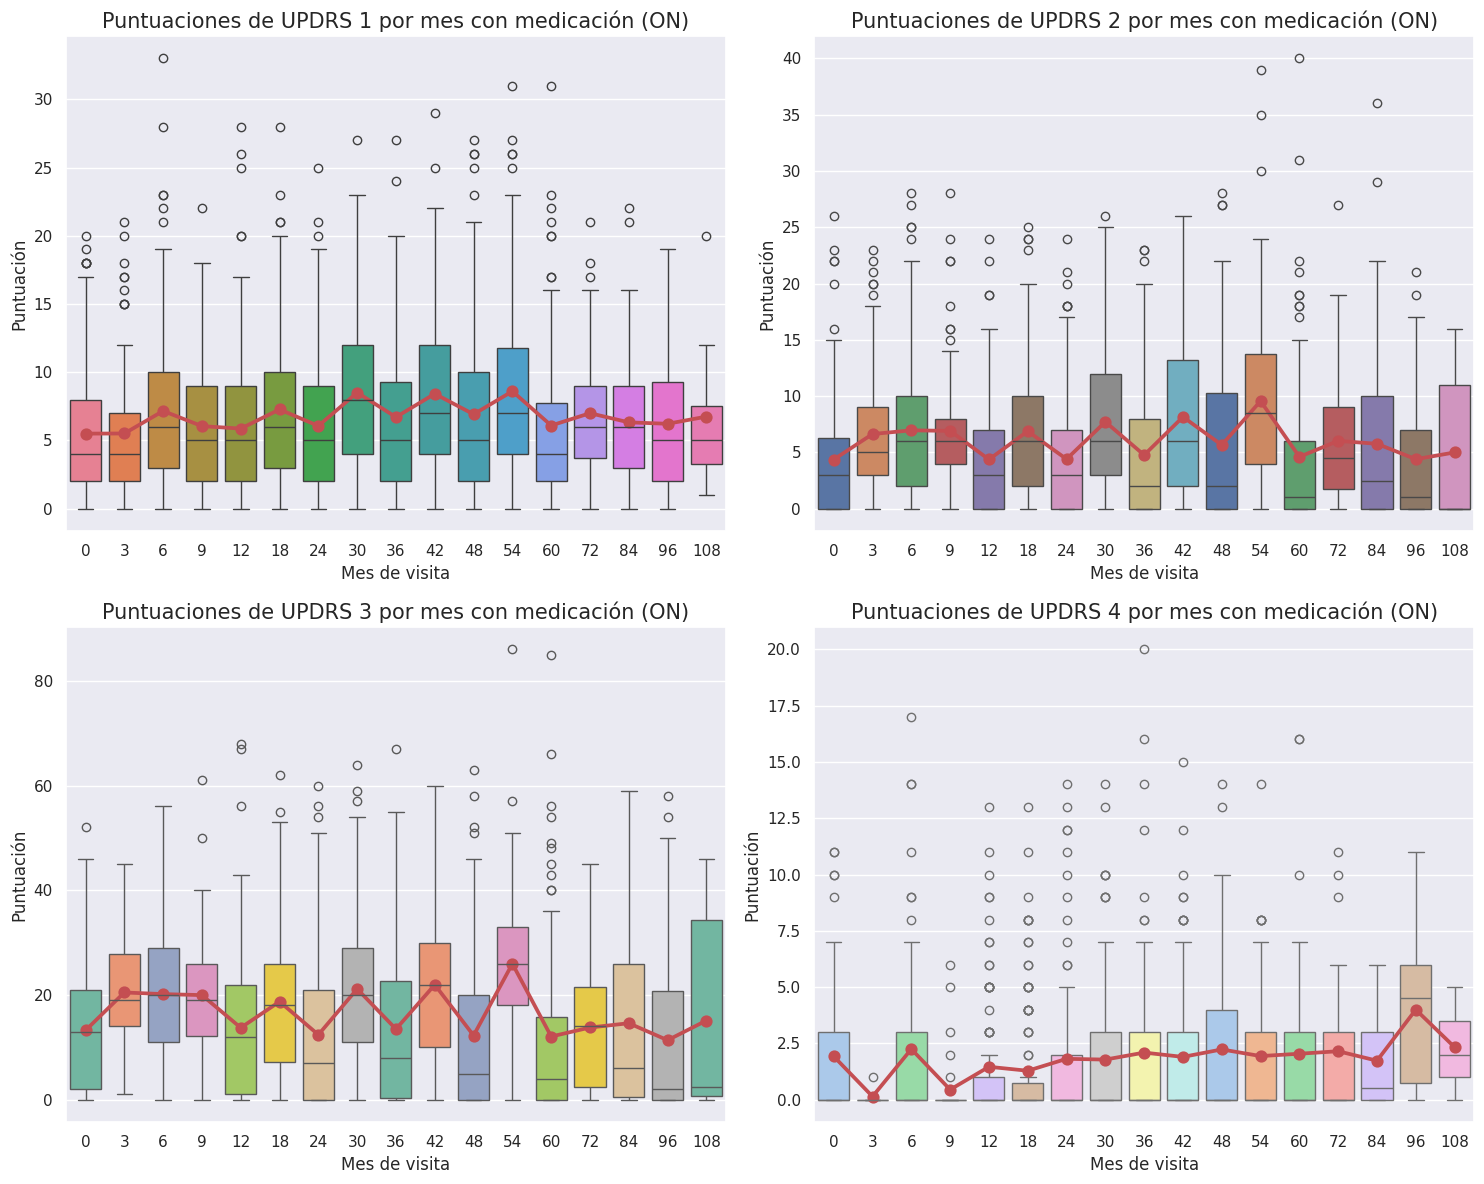

In [ ]:
#Updrs con medicacion

train_clinical_data_copy = train_clinical_data.copy()
train_clinical_data_copy["upd23b_clinical_state_on_medication"] = train_clinical_data_copy["upd23b_clinical_state_on_medication"].fillna("On")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sns.set_style('darkgrid')
paletas = ['husl', 'deep', 'Set2', 'pastel']
axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    data = train_clinical_data_copy[train_clinical_data_copy["upd23b_clinical_state_on_medication"] == "On"]
    ax = axs[x]
    sns.boxplot(data=data, x="visit_month", y=feature, ax=ax, palette=paletas[x])
    sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, ax=ax)
    ax.set_title("Puntuaciones de UPDRS {} por mes con medicación (ON)".format(x+1), fontsize=15)
    ax.set_xlabel("Mes de visita")
    ax.set_ylabel("Puntuación")

plt.tight_layout()
plt.show()



# Descripción de peptides

- Valores faltantes
- perfiles de evolución por mes (X): representar la evolución de la abundancia para cada peptide con líneas de colores (que diferencien peptides)
- distribución de abundancia (boxplot) por peptides

In [ ]:
# DESCRIPTIVOS DE PEPTIDES
#train_peptides.describe()
train_peptides.columns
#train_peptides.head()


Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'PeptideAbundance',
       'Peptide_dep', 'UniProt_Pep'],
      dtype='object')

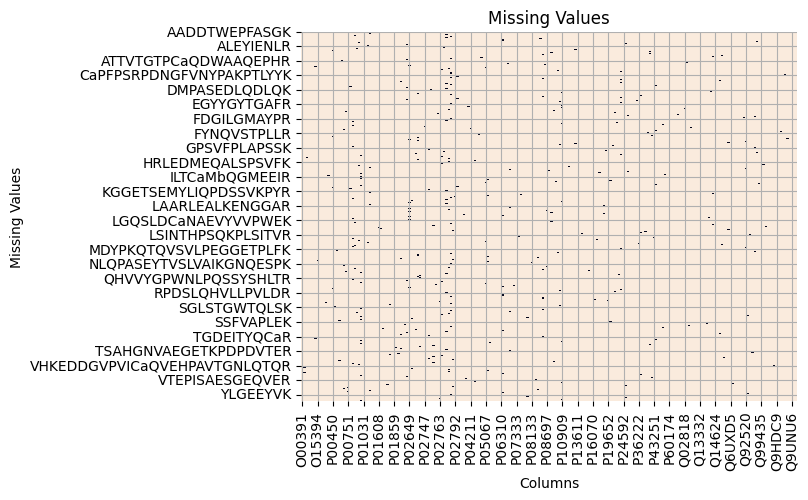

In [ ]:
# Valores faltantes
# Promedios por UniProt
tabla=pd.pivot_table(train_peptides,values='PeptideAbundance',index=['UniProt'],columns=['Peptide_dep'],aggfunc='mean')
# heatmap for missing values
ax = plt.axes()
sns.heatmap(tabla.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.grid()
plt.show()

In [ ]:
# Valores faltantes
tabla.isnull().sum().unique()
tabla.shape
# conclusión: cada peptide está incluido en una única proteína, por lo que podemos prescindir de
# vincular/identificar la proteína. Nos sobre la columna UniProt_Pep

(2615, 4)

<ipython-input-39-bce5f8e3c0a8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(ax=axis[row, col], x=plot_df['Peptide_dep'], y=plot_df['PeptideAbundance'], palette='husl')
<ipython-input-39-bce5f8e3c0a8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size=7)
<ipython-input-39-bce5f8e3c0a8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(ax=axis[row, col], x=plot_df['Peptide_dep'], y=plot_df['PeptideAbundance'], palette='husl')
<ipython-input-39-bce5f8e3c0a8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90

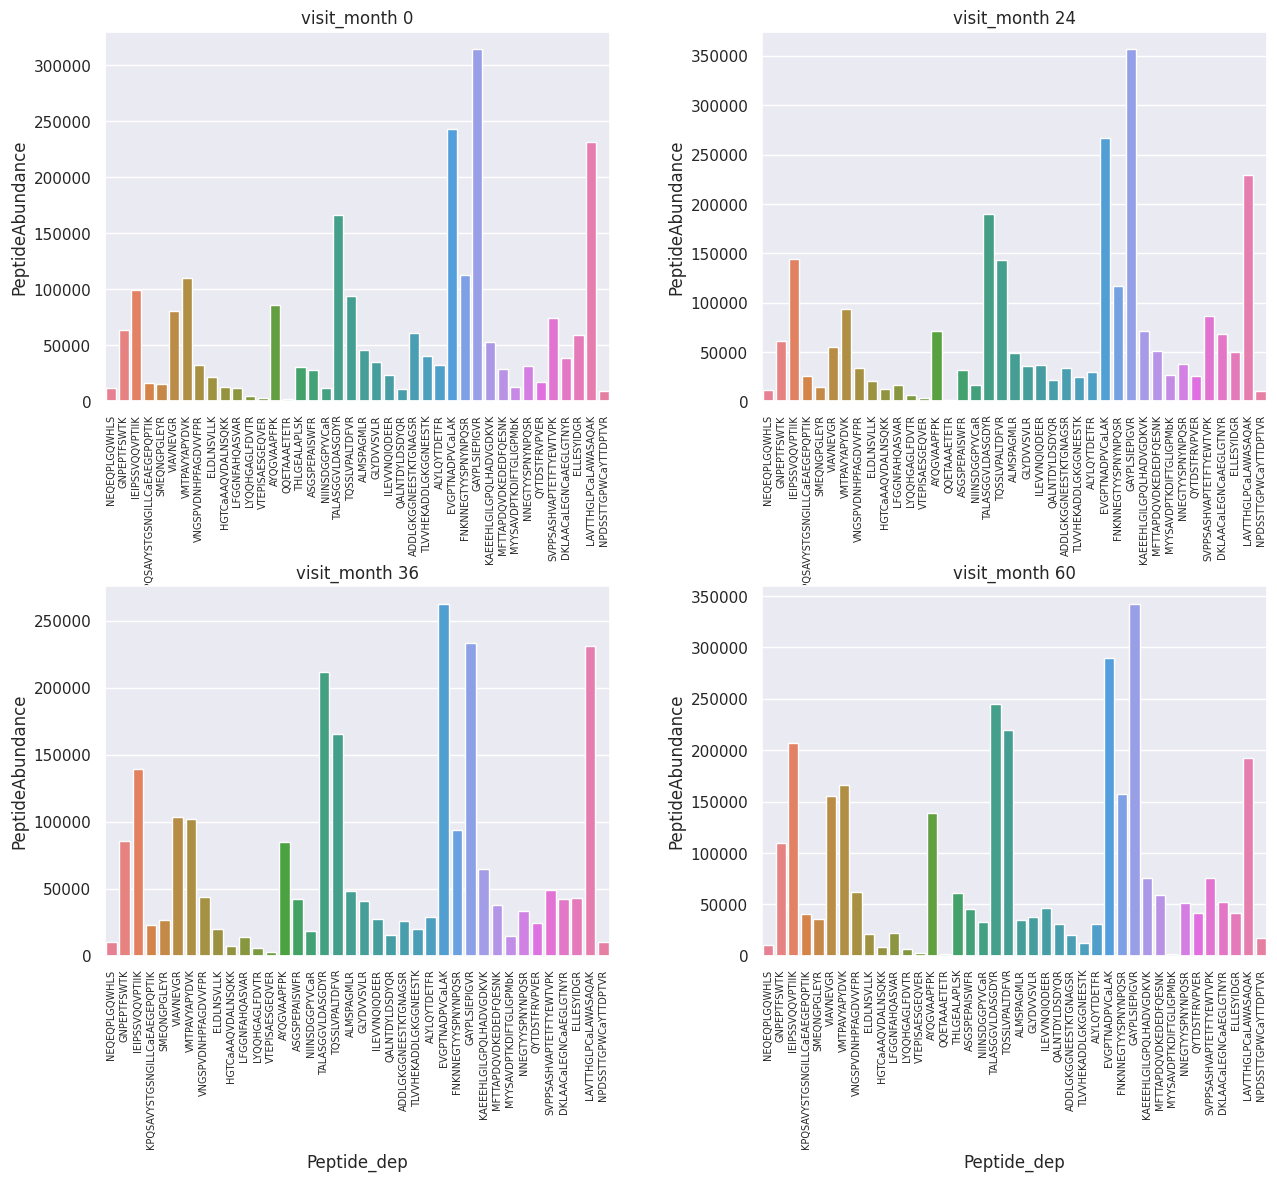

In [ ]:
pep_plot_df = train_peptides[train_peptides["patient_id"] == 1517]
pep_list = pep_plot_df['Peptide_dep'].unique()
pep_list = pep_list[:40]
pep_plot_df = pep_plot_df[pep_plot_df['Peptide_dep'].isin(pep_list)]
unique_month = pep_plot_df['visit_month'].unique()
unique_month.sort()
p_len = len(unique_month)

n_rows = math.ceil(p_len / 2)

figure, axis = plt.subplots(n_rows, 2, figsize=(15, n_rows * 6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, month in enumerate(unique_month):
    row = i // 2
    col = i % 2
    plot_df = pep_plot_df[pep_plot_df['visit_month'] == month]
    bp = sns.barplot(ax=axis[row, col], x=plot_df['Peptide_dep'], y=plot_df['PeptideAbundance'], palette='husl')
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size=7)
    axis[row, col].set_title('visit_month ' + str(month))

plt.show()


In [ ]:
import pandas as pd

def divide_en_deciles(df):
    df['Decil'] = pd.qcut(df['PeptideAbundance'], q=10, labels=False)
    return df

train_peptides.reset_index(drop=True, inplace=True)

train_peptides = divide_en_deciles(train_peptides)

peptide_deciles = train_peptides.groupby('Peptide_dep')['Decil'].apply(set)

diferentes_deciles = peptide_deciles.apply(len).gt(1)

if diferentes_deciles.any():
    print("¡Hay péptidos que están en diferentes deciles en diferentes meses!")
    print(peptide_deciles[diferentes_deciles])
else:
    print("¡Todos los péptidos están en los mismos deciles en todos los meses!")

decil_rangos = train_peptides.groupby('Decil')['PeptideAbundance'].agg(['min', 'max'])

for decil, rango in decil_rangos.iterrows():
    print(f"Decil {decil + 1}: Abundancia de {rango['min']:.2f} a {rango['max']:.2f}")


¡Hay péptidos que están en diferentes deciles en diferentes meses!
Peptide_dep
AADDTWEPFASGK                                       {8, 9}
AAFGQGSGPIMLDEVQCaTGTEASLADCaK       {0, 1, 2, 3, 4, 5, 6}
AAFTECaCaQAADK                                      {8, 9}
AANEVSSADVK                             {0, 1, 2, 3, 4, 5}
AATGECaTATVGKR                                   {0, 1, 2}
                                            ...           
YVNKEIQNAVNGVK                       {0, 2, 3, 4, 5, 6, 7}
YWGVASFLQK                        {0, 1, 2, 3, 4, 5, 6, 7}
YYCaFQGNQFLR                      {0, 3, 4, 5, 6, 7, 8, 9}
YYTYLIMNK                               {0, 1, 2, 3, 4, 5}
YYWGGQYTWDMAK                              {0, 1, 2, 3, 4}
Name: Decil, Length: 949, dtype: object
Decil 1: Abundancia de 11.00 a 12578.10
Decil 2: Abundancia de 12578.40 a 22529.70
Decil 3: Abundancia de 22529.80 a 34787.90
Decil 4: Abundancia de 34788.00 a 51661.60
Decil 5: Abundancia de 51661.70 a 74308.20
Decil 6: Abundancia 

<ipython-input-8-e71c6b91f506>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pep_plot_df[pep_plot_df['Peptide_dep'] == peptide], x='visit_month', y='PeptideAbundance', palette='husl')
<ipython-input-8-e71c6b91f506>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pep_plot_df[pep_plot_df['Peptide_dep'] == peptide], x='visit_month', y='PeptideAbundance', palette='husl')
<ipython-input-8-e71c6b91f506>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pep_plot_df[pep_plot_df['Peptide_dep'] == peptide], x='visit_month', y='Pep

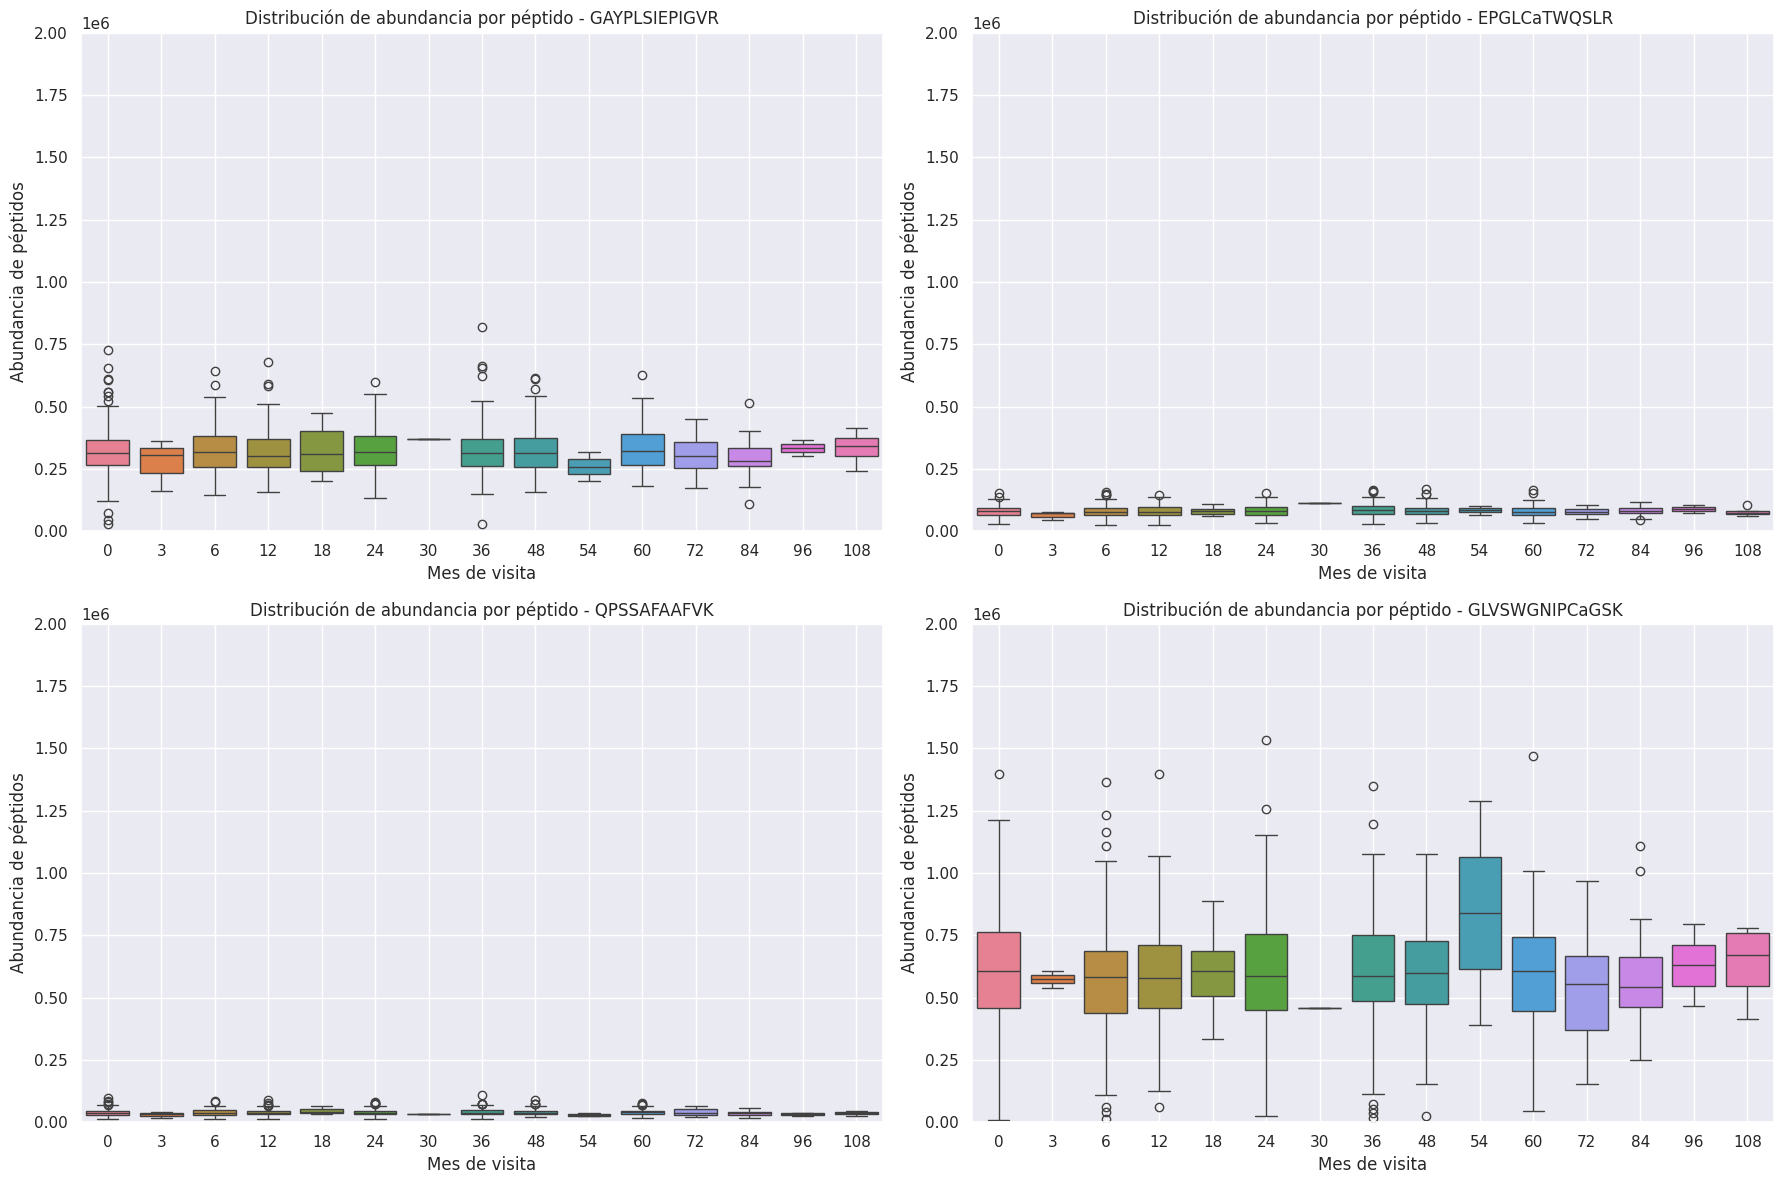

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Lista de péptidos específicos
peptides = ["GAYPLSIEPIGVR", "EPGLCaTWQSLR", "QPSSAFAAFVK", "GLVSWGNIPCaGSK"]

# Filtrar el DataFrame por los péptidos específicos
pep_plot_df = train_peptides[train_peptides['Peptide_dep'].isin(peptides)]

# Configuración del estilo del gráfico
sns.set(style="darkgrid")
plt.figure(figsize=(18, 12))

# Crear subplots para cada péptido
for i, peptide in enumerate(peptides):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=pep_plot_df[pep_plot_df['Peptide_dep'] == peptide], x='visit_month', y='PeptideAbundance', palette='husl')
    plt.title(f'Distribución de abundancia por péptido - {peptide}')
    plt.xlabel('Mes de visita')
    plt.ylabel('Abundancia de péptidos')
    plt.ylim(0, 2e6)  # Ajustar el límite del eje y si es necesario
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
peptides_mes_0 = train_peptides[train_peptides['visit_month'] == 0]
abundancia_por_peptido_mes_0 = peptides_mes_0.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_0 = abundancia_por_peptido_mes_0.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_0)

peptides_mes_54 = train_peptides[train_peptides['visit_month'] == 54]
abundancia_por_peptido_mes_54 = peptides_mes_54.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_54 = abundancia_por_peptido_mes_54.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_54)

peptides_mes_72 = train_peptides[train_peptides['visit_month'] == 72]
abundancia_por_peptido_mes_72 = peptides_mes_72.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_72 = abundancia_por_peptido_mes_72.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_72)

peptides_mes_96 = train_peptides[train_peptides['visit_month'] == 96]
abundancia_por_peptido_mes_96 = peptides_mes_96.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_96 = abundancia_por_peptido_mes_96.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_96)


Peptide_dep
KVPQVSTPTLVEVSR    1.420514e+10
QTALVELVK          5.634491e+09
YLYEIAR            4.748613e+09
FQNALLVR           4.107428e+09
FKDLGEENFK         3.819985e+09
                       ...     
QQETAAAETETR       3.404580e+05
GCaPTEEGCaGER      3.329449e+05
HNCaMENSICaR       3.291845e+05
PNHAVVTR           2.965156e+05
RTHLPEVFLSK        1.963607e+04
Name: PeptideAbundance, Length: 968, dtype: float64
Peptide_dep
KVPQVSTPTLVEVSR     1.277027e+08
MATLYSR             5.661780e+07
QTALVELVK           4.905320e+07
YLYEIAR             4.431710e+07
TMLLQPAGSLGSYSYR    4.209420e+07
                        ...     
HYEGSTVPEK          2.882500e+03
YAMVYGYNAAYNR       2.621060e+03
QQLVETHMAR          1.748720e+03
VFAVSHGR            1.412800e+03
RTHLPEVFLSK         2.896154e+02
Name: PeptideAbundance, Length: 956, dtype: float64
Peptide_dep
KVPQVSTPTLVEVSR    1.372186e+09
QTALVELVK          5.680042e+08
YLYEIAR            4.933397e+08
FQNALLVR           4.197597e+08
FKDLGEENFK       

In [ ]:
peptides_mes_0 = train_peptides[train_peptides['visit_month'] == 0]
abundancia_por_peptido_mes_0 = peptides_mes_0.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_0 = abundancia_por_peptido_mes_0.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_0)

peptides_mes_12 = train_peptides[train_peptides['visit_month'] == 12]
abundancia_por_peptido_mes_12 = peptides_mes_12.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_12 = abundancia_por_peptido_mes_12.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_12)

peptides_mes_24 = train_peptides[train_peptides['visit_month'] == 24]
abundancia_por_peptido_mes_24 = peptides_mes_24.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_24 = abundancia_por_peptido_mes_24.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_24)

peptides_mes_36 = train_peptides[train_peptides['visit_month'] == 36]
abundancia_por_peptido_mes_36 = peptides_mes_36.groupby('Peptide_dep')['PeptideAbundance'].sum()
peptidos_con_mayor_abundancia_mes_36 = abundancia_por_peptido_mes_36.sort_values(ascending=False)
print(peptidos_con_mayor_abundancia_mes_36)

Peptide_dep
KVPQVSTPTLVEVSR    1.420514e+10
QTALVELVK          5.634491e+09
YLYEIAR            4.748613e+09
FQNALLVR           4.107428e+09
FKDLGEENFK         3.819985e+09
                       ...     
QQETAAAETETR       3.404580e+05
GCaPTEEGCaGER      3.329449e+05
HNCaMENSICaR       3.291845e+05
PNHAVVTR           2.965156e+05
RTHLPEVFLSK        1.963607e+04
Name: PeptideAbundance, Length: 968, dtype: float64
Peptide_dep
KVPQVSTPTLVEVSR    1.276522e+10
QTALVELVK          5.050828e+09
YLYEIAR            4.383706e+09
FQNALLVR           3.872177e+09
FKDLGEENFK         3.436419e+09
                       ...     
GCaPTEEGCaGER      3.399282e+05
PNHAVVTR           3.204634e+05
HNCaMENSICaR       2.835340e+05
QQETAAAETETR       2.794080e+05
RTHLPEVFLSK        1.744413e+04
Name: PeptideAbundance, Length: 968, dtype: float64
Peptide_dep
KVPQVSTPTLVEVSR    1.252464e+10
QTALVELVK          5.079032e+09
YLYEIAR            4.280884e+09
FQNALLVR           3.881048e+09
FKDLGEENFK         3.486794e

<ipython-input-10-942e86cc6a41>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
<ipython-input-10-942e86cc6a41>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
<ipython-input-10-942e86cc6a41>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
<ipython-input-10-942e86cc6a41>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)


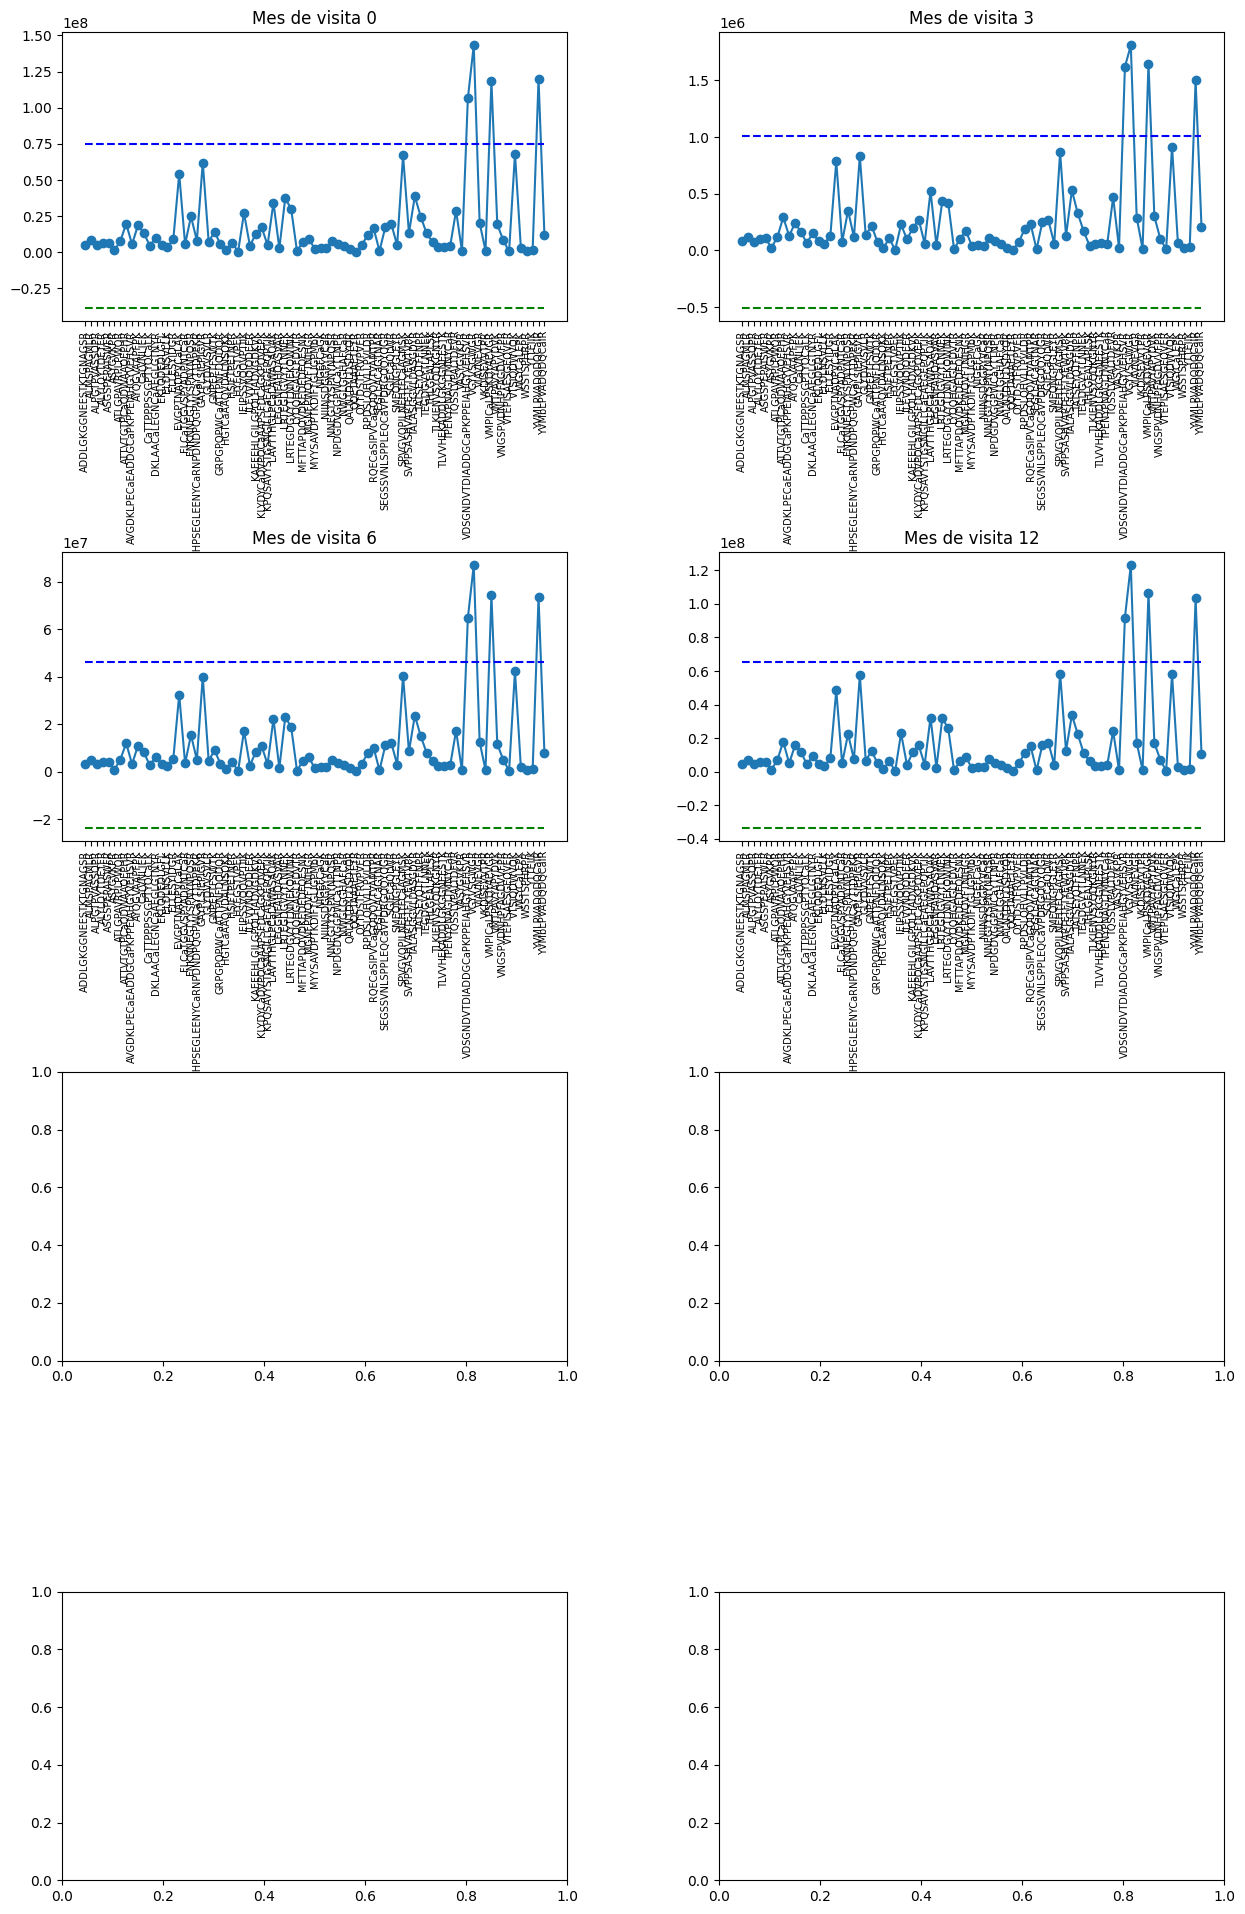

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

protein_list = train_peptides['Peptide_dep'].unique()[1:80]
pro_plot_df = train_peptides[train_peptides['Peptide_dep'].isin(protein_list)]

unique_months = np.sort(pro_plot_df['visit_month'].unique())

selected_months = unique_months[:4]

n_rows = len(selected_months)
n_cols = 2
figure, axis = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

for i, month in enumerate(selected_months):
    row = i // n_cols
    col = i % n_cols
    plot_df = pro_plot_df[pro_plot_df['visit_month'] == month]

    sum_values = plot_df.groupby('Peptide_dep')['PeptideAbundance'].sum()
    mean_value = sum_values.mean()
    std_value = sum_values.std()

    ax = axis[row, col]

    ax.plot(sum_values.index, sum_values.values, marker='o', label='Suma de PeptideAbundance')
    ax.plot(sum_values.index, [mean_value - 2 * std_value] * len(sum_values), color='g', linestyle='--', label='-2 Desviaciones Típicas')
    ax.plot(sum_values.index, [mean_value + 2 * std_value] * len(sum_values), color='b', linestyle='--', label='+2 Desviaciones Típicas')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)

    ax.set_title(f'Mes de visita {month}')


for i in range(n_rows * n_cols, len(selected_months)):
    axis[i // n_cols, i % n_cols].axis('off')

plt.show()


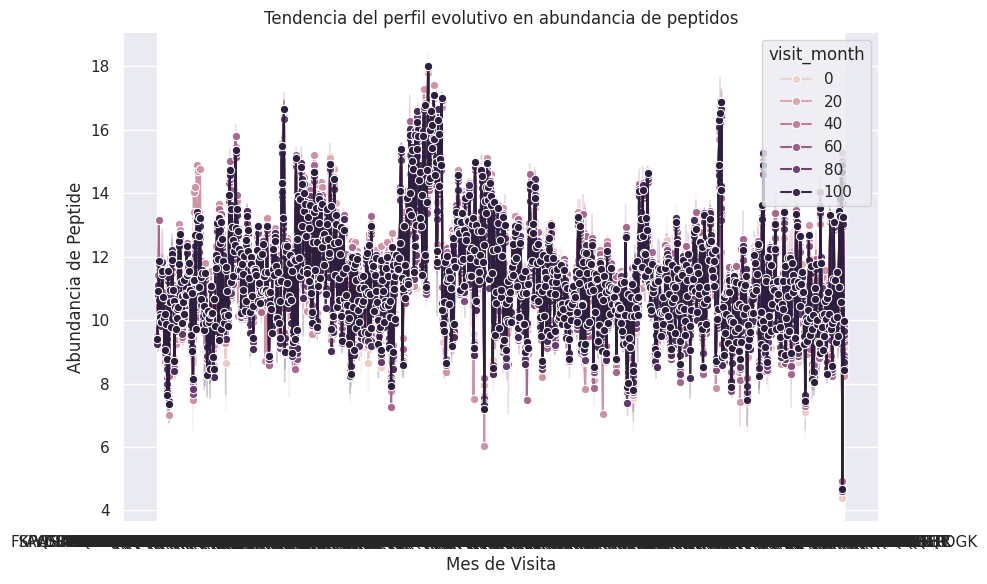

In [ ]:
train_peptides_copy = train_peptides.copy()
train_peptides_copy["log_PepAbun"] = np.log(train_peptides_copy["PeptideAbundance"])


sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=train_peptides_copy, x='Peptide_dep', y='log_PepAbun', marker='o', hue="visit_month")
plt.title('Tendencia del perfil evolutivo en abundancia de peptidos')
plt.xlabel('Mes de Visita')
plt.ylabel('Abundancia de Peptide')
plt.tight_layout()

plt.show()

<ipython-input-13-f927df349a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_peptides, x='Peptide_dep', y='PeptideAbundance', palette='husl')


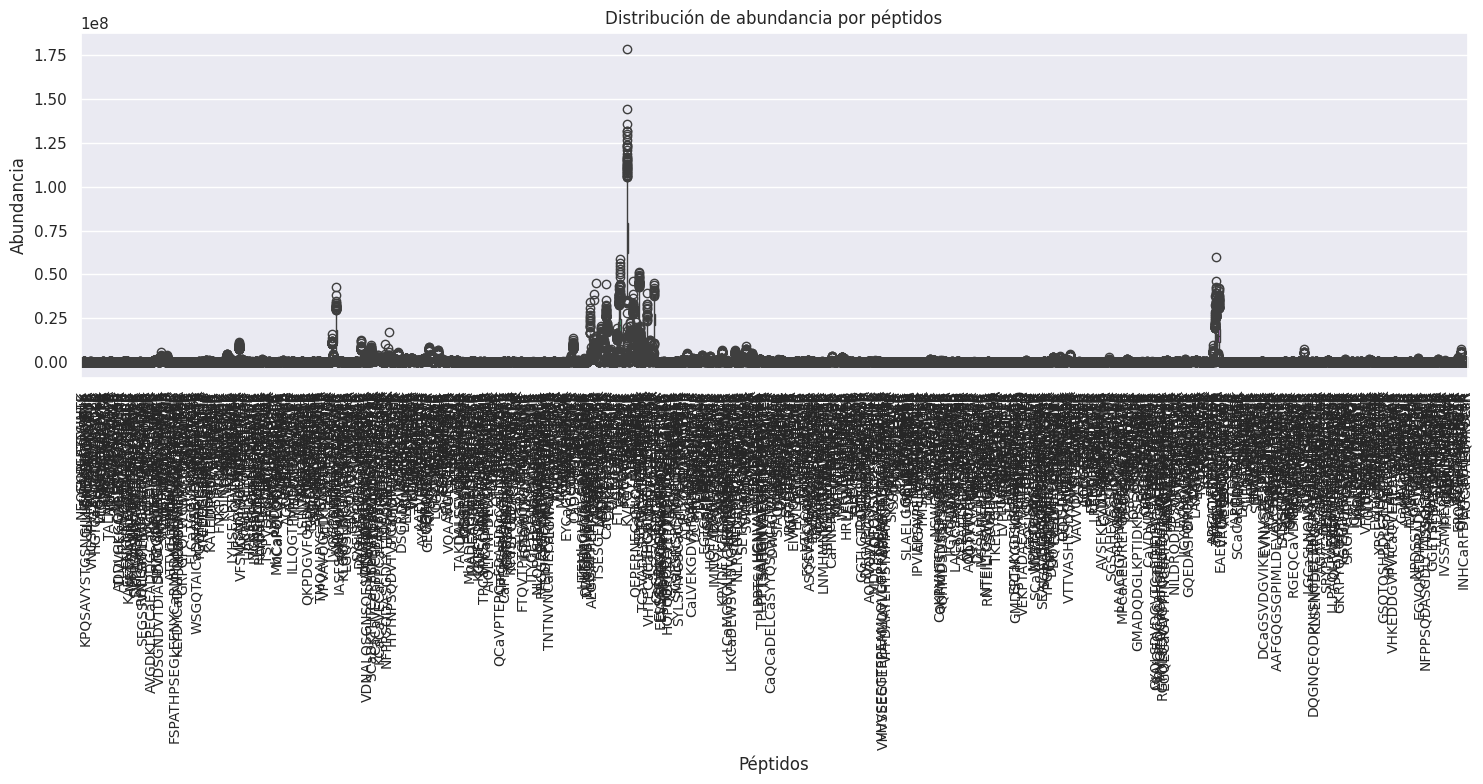

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 8))

sns.boxplot(data=train_peptides, x='Peptide_dep', y='PeptideAbundance', palette='husl')
plt.xticks(rotation=90, size=10)
plt.title('Distribución de abundancia por péptidos')
plt.xlabel('Péptidos')
plt.ylabel('Abundancia')
plt.tight_layout()

plt.show()


<ipython-input-13-bfac7cf894df>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.boxplot(data=train_peptides_copy, x="visit_month", y="log_PepAbun", palette='husl', ax=ax)
<ipython-input-13-bfac7cf894df>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=train_peptides_copy, x="visit_month", y="log_PepAbun", color="r", ci=None, ax=ax)


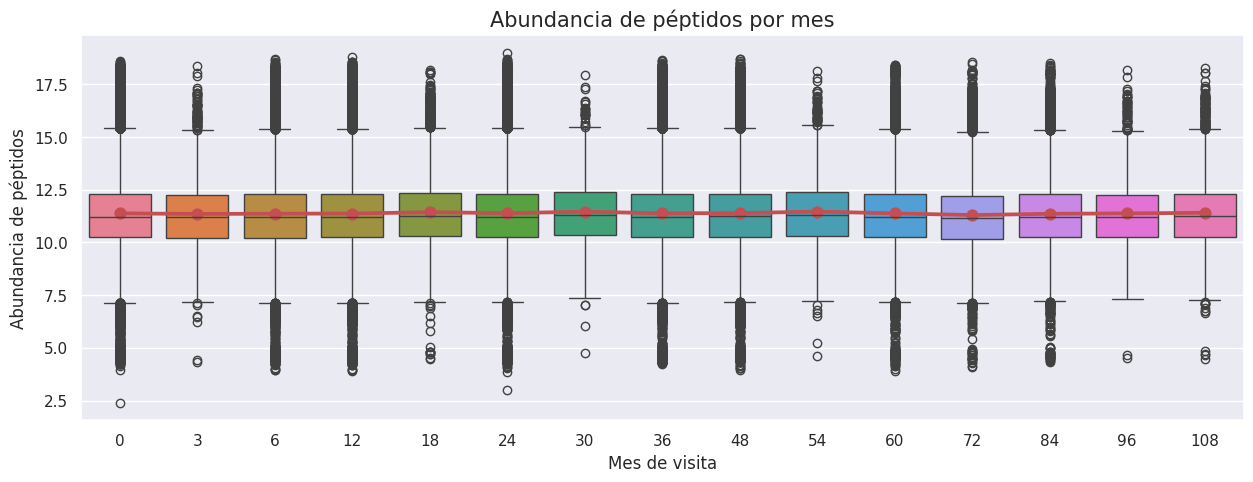

In [ ]:
train_peptides_copy = train_peptides.copy()
train_peptides_copy["log_PepAbun"] = np.log(train_peptides_copy["PeptideAbundance"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_peptides_copy, x="visit_month", y="log_PepAbun", palette='husl', ax=ax)
_ = sns.pointplot(data=train_peptides_copy, x="visit_month", y="log_PepAbun", color="r", ci=None, ax=ax)
_ = ax.set_title("Abundancia de péptidos por mes", fontsize=15)
_ = ax.set_xlabel("Mes de visita")
_ = ax.set_ylabel("Abundancia de péptidos")

<ipython-input-7-c2077d02e6ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pep_plot_df, x='Peptide_dep', y='PeptideAbundance', palette='husl')


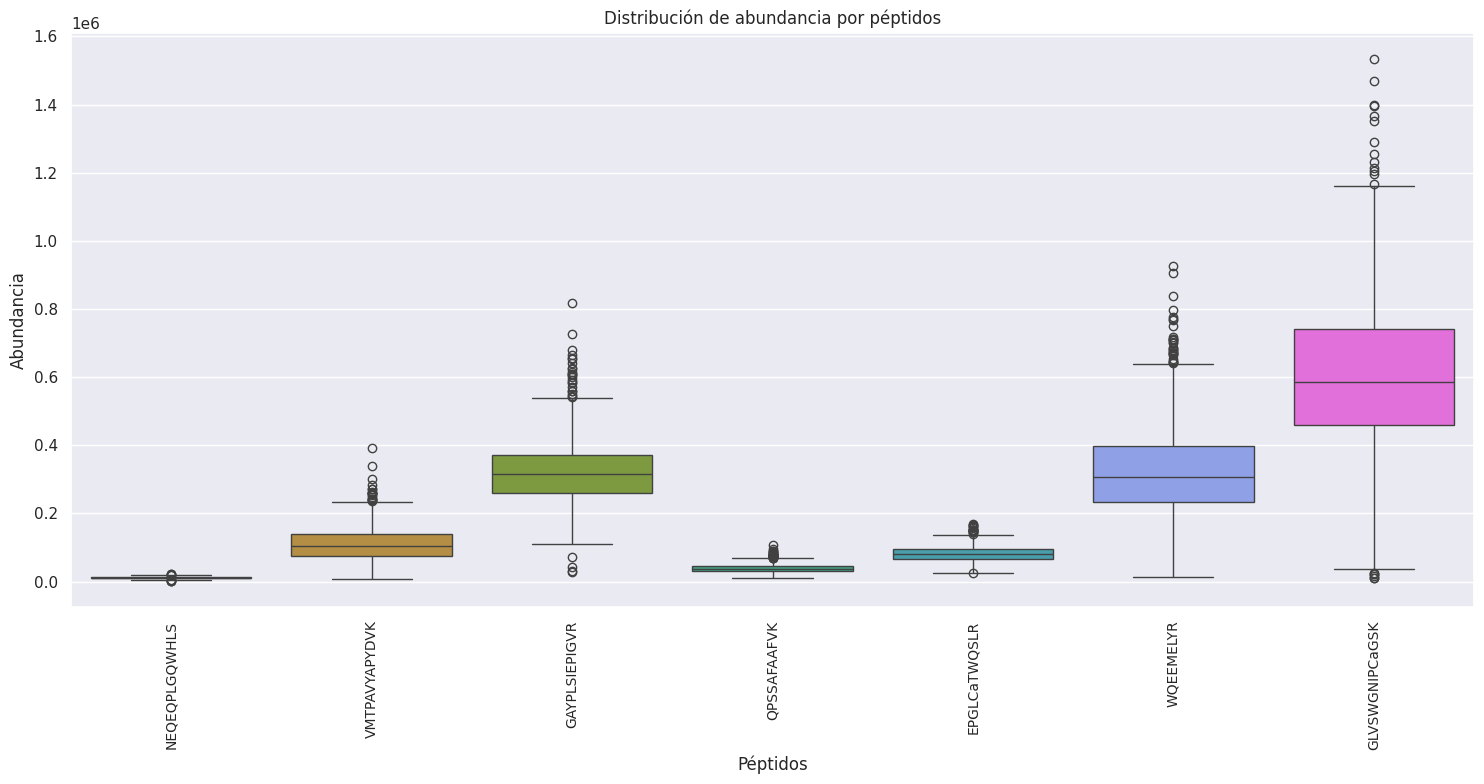

In [ ]:

peptides = ["GAYPLSIEPIGVR", "EPGLCaTWQSLR", "WQEEMELYR", "QPSSAFAAFVK", "GLVSWGNIPCaGSK", "NEQEQPLGQWHLS", "VMTPAVYAPYDVK"]

# Filtrar el DataFrame por los péptidos específicos
pep_plot_df = train_peptides[train_peptides['Peptide_dep'].isin(peptides)]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 8))

sns.boxplot(data=pep_plot_df, x='Peptide_dep', y='PeptideAbundance', palette='husl')
plt.xticks(rotation=90, size=10)
plt.title('Distribución de abundancia por péptidos')
plt.xlabel('Péptidos')
plt.ylabel('Abundancia')
plt.tight_layout()

plt.show()

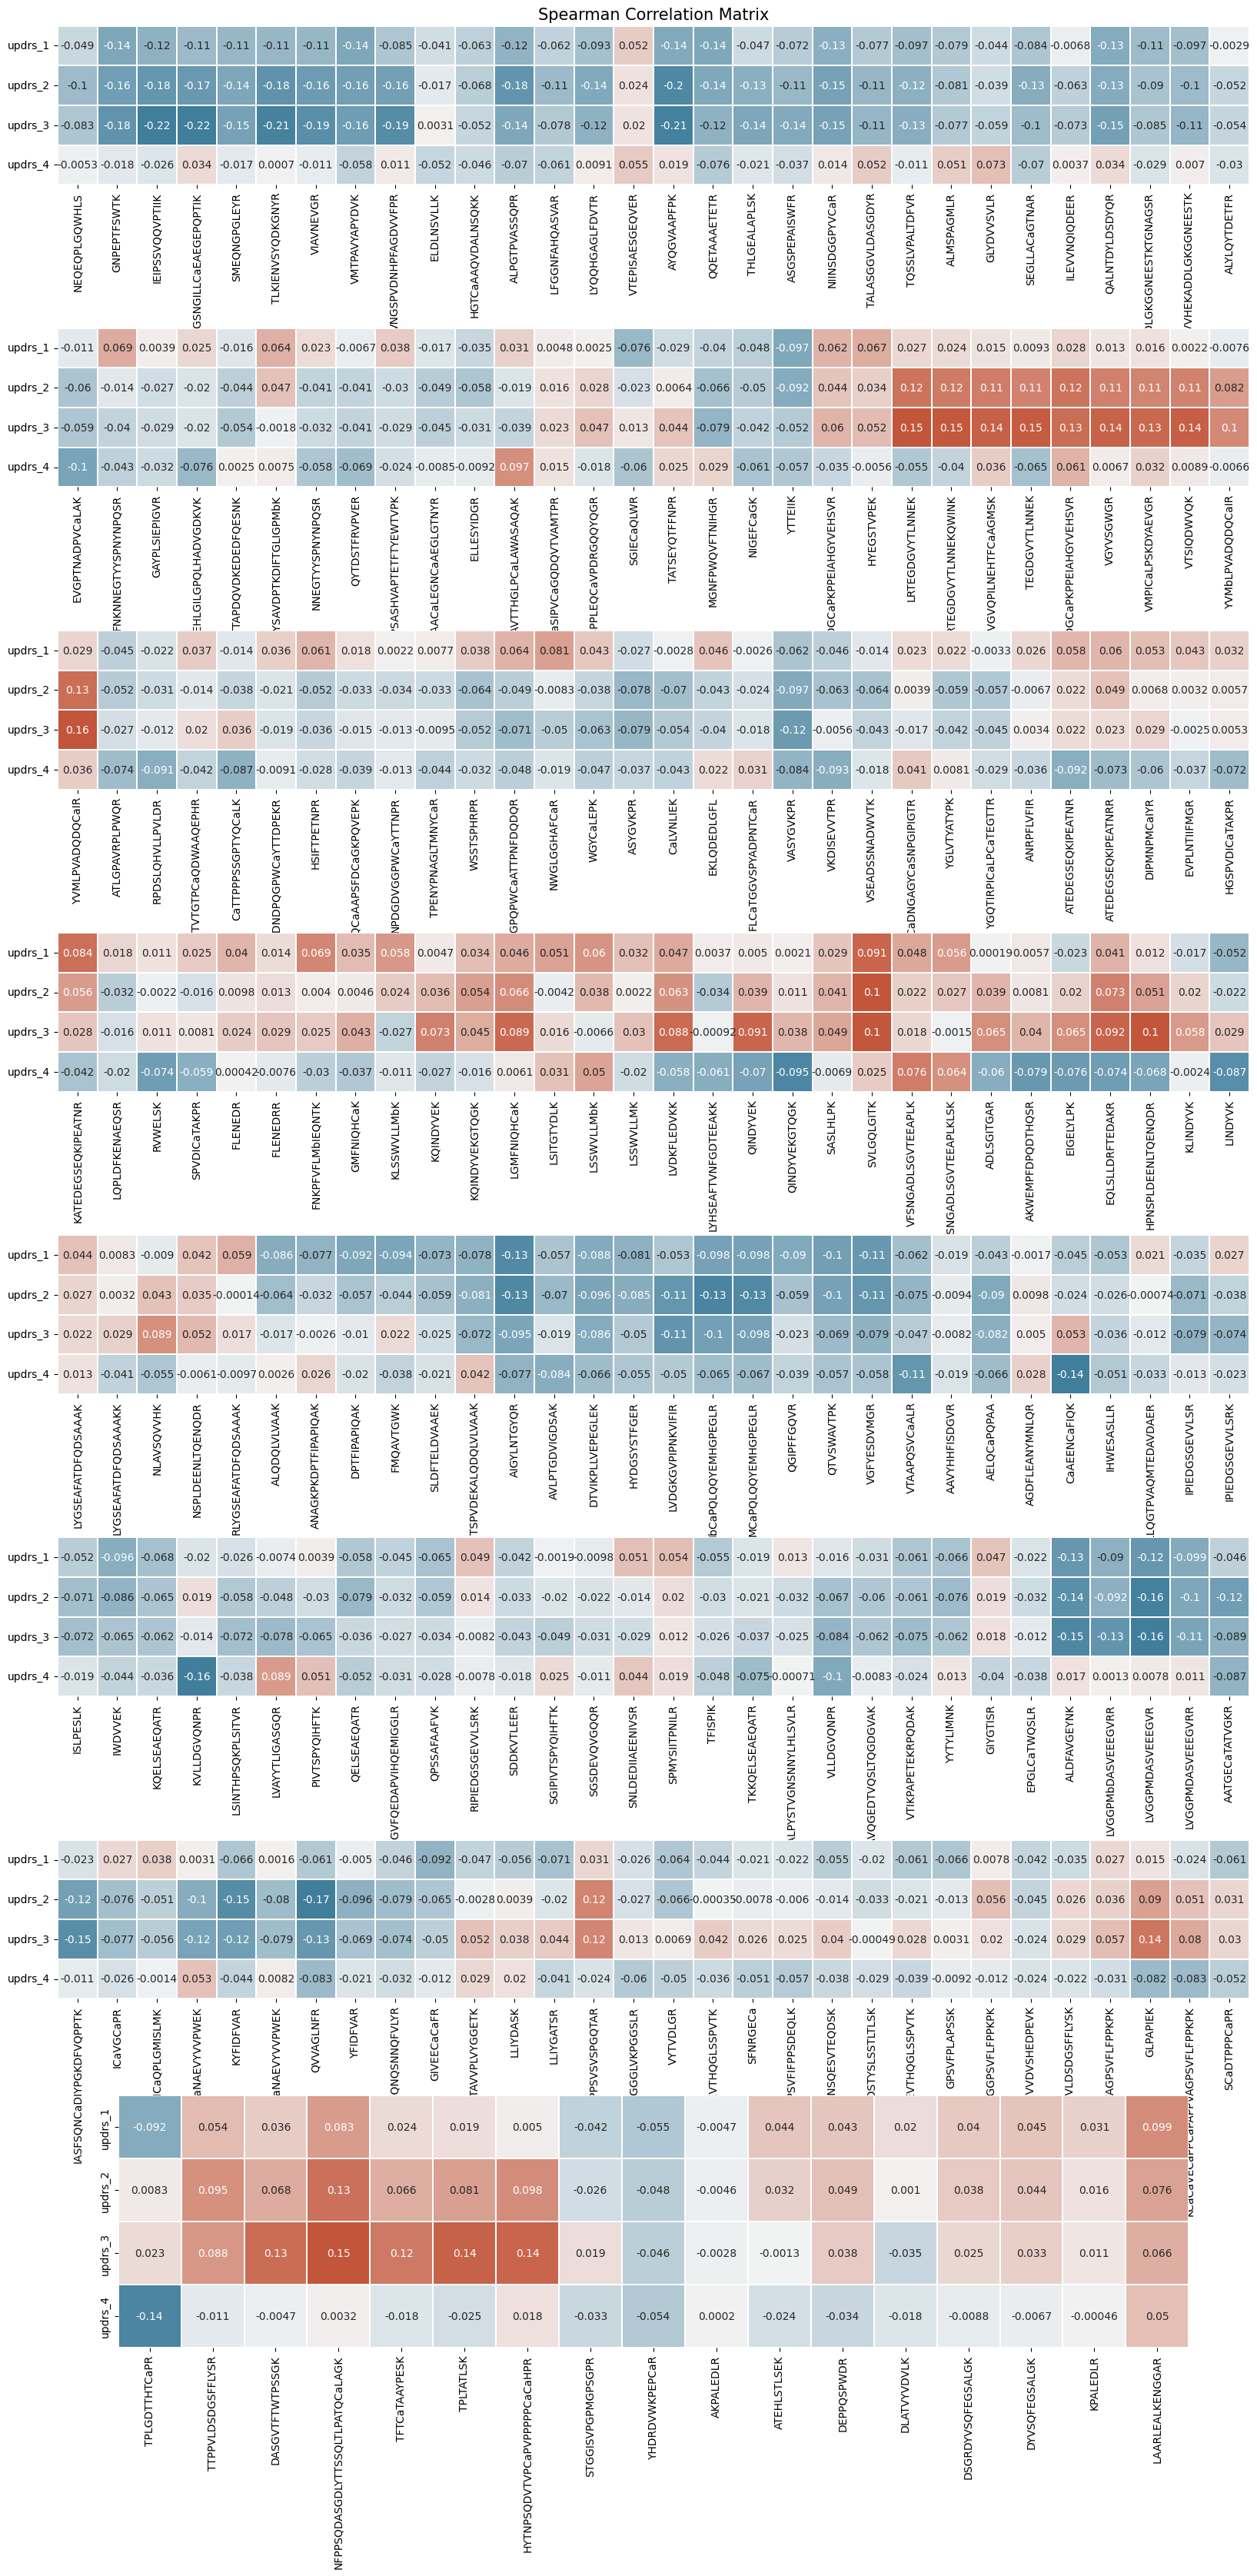

In [ ]:
features = []
features.extend(peptides)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)

# Descripción de Protein

- Valores faltantes
- perfiles de evolución por mes (X): representar la evolución de la abundancia para cada UniProt con líneas de colores (que diferencien UniProt)
- distribución del NFX (boxplot) por UniProt (eje X) en cada mes de seguimiento (diferentes gráficos)

In [ ]:
train_proteins.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], dtype='object')

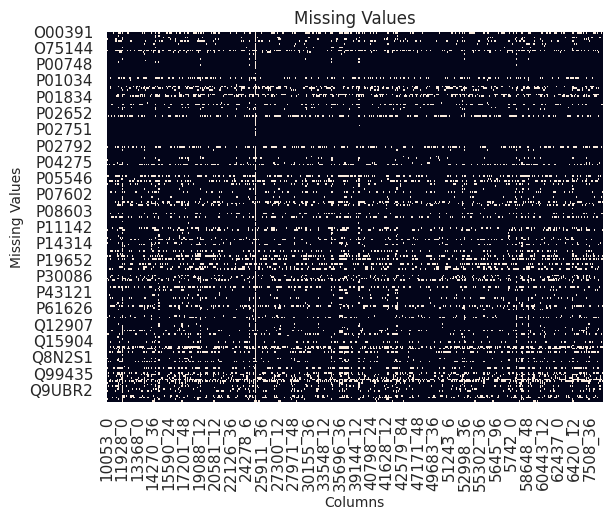

In [ ]:
# Promedios por visit_id
tabla=pd.pivot_table(train_proteins,values='NPX',index=['visit_id'],columns=['UniProt'],aggfunc='mean')
# heatmap for missing values
ax = plt.axes()
sns.heatmap(tabla.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.grid()
plt.show()

In [ ]:
tabla.isnull().sum().unique()

array([349,   1,  13,  81,  66, 171,   0,  63,   3,  34,   4, 419,  79,
        17,  23,   2,  14,  10, 289, 341, 354, 138, 459, 307,   6, 282,
        69,  40, 404, 393,  30,  29,  78,  18,  45, 376, 398, 418, 139,
        21,  67, 190, 207, 235,  11, 173, 269,   7, 219, 240,  22,  15,
        95, 259,  77, 163,  19, 261, 391, 415, 208, 366, 175, 136, 201,
       335, 409,  12,  96, 162,  44, 384,  58,  88, 239,  39,  38,  26,
       204,  20, 220,   8, 189, 497, 452, 373, 110,  41, 210,   9, 348,
       304, 296, 188, 180, 624, 507, 114,  64, 154, 156, 141, 206, 352,
        61])

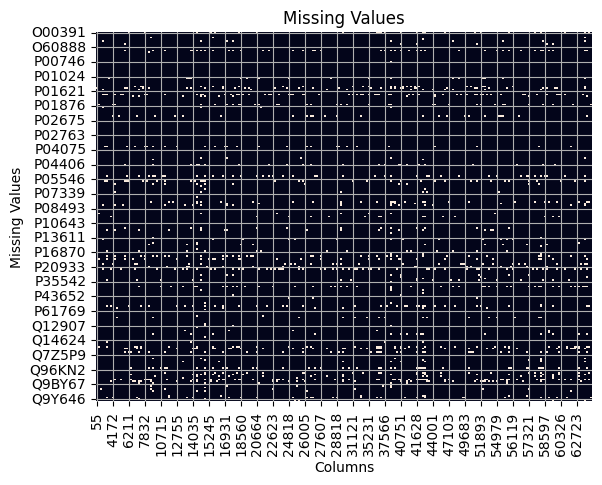

In [ ]:
# Promedios por patient_id
tabla=pd.pivot_table(train_proteins,values='NPX',index=['patient_id'],columns=['UniProt'],aggfunc='mean')
# heatmap for missing values
ax = plt.axes()
sns.heatmap(tabla.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.grid()
plt.show()

In [ ]:
tabla.isnull().sum().unique()
# el recuento de las diferentes proteínas sí se ha realizado a casi todos los pacientes, pero en diferentes visitas

array([25,  0,  3,  1,  9,  6, 41, 17, 35, 12, 63, 11, 34,  4, 27,  5,  2,
       23, 42, 28, 16,  7, 15, 14, 10, 36, 31, 55,  8, 43, 37, 38, 19, 61,
       29])

<ipython-input-10-0011ad1dfd6b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peptides_visit_month_0['Decil'] = pd.cut(peptides_visit_month_0['NPX'], bins=deciles_visit_month_0, labels=False)
<ipython-input-10-0011ad1dfd6b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peptides_visit_month_54['Decil'] = pd.cut(peptides_visit_month_54['NPX'], bins=deciles_visit_month_54, labels=False)
<ipython-input-10-0011ad1dfd6b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

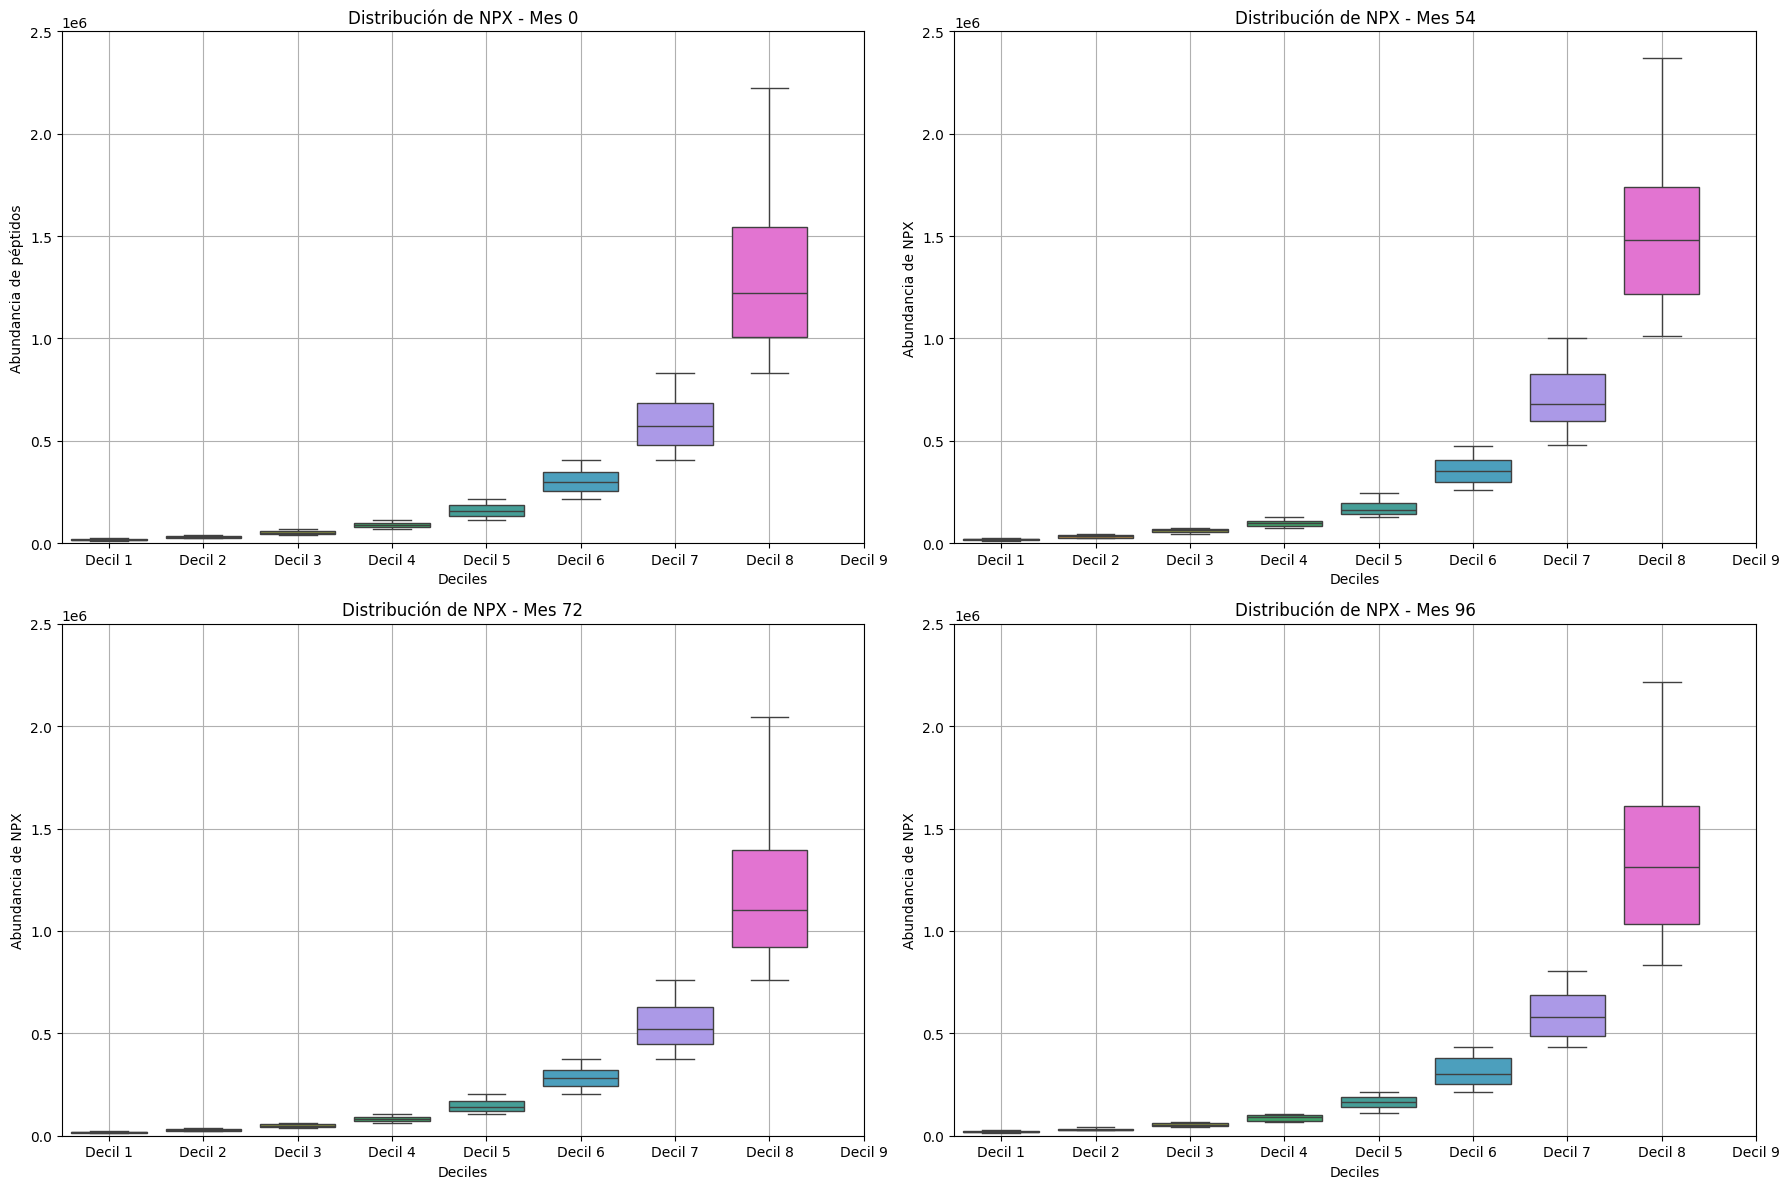

In [ ]:
peptides_visit_month_0 = train_proteins[train_proteins['visit_month'] == 0]
deciles_visit_month_0 = np.percentile(peptides_visit_month_0['NPX'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
peptides_visit_month_0['Decil'] = pd.cut(peptides_visit_month_0['NPX'], bins=deciles_visit_month_0, labels=False)

peptides_visit_month_54 = train_proteins[train_proteins['visit_month'] == 54]
deciles_visit_month_54 = np.percentile(peptides_visit_month_54['NPX'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
peptides_visit_month_54['Decil'] = pd.cut(peptides_visit_month_54['NPX'], bins=deciles_visit_month_54, labels=False)

peptides_visit_month_72 = train_proteins[train_proteins['visit_month'] == 72]
deciles_visit_month_72 = np.percentile(peptides_visit_month_72['NPX'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
peptides_visit_month_72['Decil'] = pd.cut(peptides_visit_month_72['NPX'], bins=deciles_visit_month_72, labels=False)

peptides_visit_month_96 = train_proteins[train_proteins['visit_month'] == 96]
deciles_visit_month_96 = np.percentile(peptides_visit_month_96['NPX'], [10, 20, 30, 40, 50, 60, 70, 80, 90])
peptides_visit_month_96['Decil'] = pd.cut(peptides_visit_month_96['NPX'], bins=deciles_visit_month_96, labels=False)

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=peptides_visit_month_0, x='Decil', y='NPX', palette='husl')
plt.title('Distribución de NPX - Mes 0')
plt.xlabel('Deciles')
plt.ylabel('Abundancia de péptidos')
plt.xticks(ticks=range(len(deciles_visit_month_0)), labels=[f'Decil {i+1}' for i in range(len(deciles_visit_month_0))])
plt.ylim(0, 2500000)  # Establecer límite del eje y
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(data=peptides_visit_month_54, x='Decil', y='NPX', palette='husl')
plt.title('Distribución de NPX - Mes 54')
plt.xlabel('Deciles')
plt.ylabel('Abundancia de NPX')
plt.xticks(ticks=range(len(deciles_visit_month_54)), labels=[f'Decil {i+1}' for i in range(len(deciles_visit_month_54))])
plt.ylim(0, 2500000)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.boxplot(data=peptides_visit_month_72, x='Decil', y='NPX', palette='husl')
plt.title('Distribución de NPX - Mes 72')
plt.xlabel('Deciles')
plt.ylabel('Abundancia de NPX')
plt.xticks(ticks=range(len(deciles_visit_month_72)), labels=[f'Decil {i+1}' for i in range(len(deciles_visit_month_72))])
plt.ylim(0, 2500000)
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(data=peptides_visit_month_96, x='Decil', y='NPX', palette='husl')
plt.title('Distribución de NPX - Mes 96')
plt.xlabel('Deciles')
plt.ylabel('Abundancia de NPX')
plt.xticks(ticks=range(len(deciles_visit_month_96)), labels=[f'Decil {i+1}' for i in range(len(deciles_visit_month_96))])
plt.ylim(0, 2500000)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
proteins_mes_0 = train_proteins[train_proteins['visit_month'] == 0]
abundancia_por_proteina_mes_0 = proteins_mes_0.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_0 = abundancia_por_proteina_mes_0.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_0)

proteins_mes_12 = train_proteins[train_proteins['visit_month'] == 12]
abundancia_por_proteina_mes_12 = proteins_mes_12.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_12 = abundancia_por_proteina_mes_12.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_12)

proteins_mes_24 = train_proteins[train_proteins['visit_month'] == 24]
abundancia_por_proteina_mes_24 = proteins_mes_24.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_24 = abundancia_por_proteina_mes_24.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_24)

proteins_mes_36 = train_proteins[train_proteins['visit_month'] == 36]
abundancia_por_proteina_mes_36 = proteins_mes_36.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_36 = abundancia_por_proteina_mes_36.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_36)

UniProt
P02768    6.092595e+10
P41222    8.154925e+09
P02787    6.210932e+09
P01034    4.278044e+09
P02766    3.688641e+09
              ...     
O75326    8.327447e+05
P36980    7.808929e+05
P05408    7.433016e+05
O14791    5.019018e+05
Q99435    3.291845e+05
Name: NPX, Length: 227, dtype: float64
UniProt
P02768    5.552643e+10
P41222    7.260006e+09
P02787    5.684608e+09
P01034    3.781027e+09
P02766    3.550606e+09
              ...     
O75326    7.364719e+05
P36980    6.448213e+05
P05408    6.133179e+05
O14791    4.445922e+05
Q99435    2.835340e+05
Name: NPX, Length: 227, dtype: float64
UniProt
P02768    5.468217e+10
P41222    7.194947e+09
P02787    5.650919e+09
P01034    3.897291e+09
P02766    3.468564e+09
              ...     
O75326    7.149850e+05
P36980    6.432046e+05
P05408    5.935952e+05
O14791    4.298089e+05
Q99435    2.927517e+05
Name: NPX, Length: 227, dtype: float64
UniProt
P02768    4.644300e+10
P41222    6.132660e+09
P02787    4.795040e+09
P01034    3.269356e+09


In [ ]:
proteins_mes_0 = train_proteins[train_proteins['visit_month'] == 0]
abundancia_por_proteina_mes_0 = proteins_mes_0.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_0 = abundancia_por_proteina_mes_0.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_0)

proteins_mes_54 = train_proteins[train_proteins['visit_month'] == 54]
abundancia_por_proteina_mes_54 = proteins_mes_54.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_54 = abundancia_por_proteina_mes_54.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_54)

proteins_mes_72 = train_proteins[train_proteins['visit_month'] == 72]
abundancia_por_proteina_mes_72 = proteins_mes_72.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_72 = abundancia_por_proteina_mes_72.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_72)

proteins_mes_96 = train_proteins[train_proteins['visit_month'] == 96]
abundancia_por_proteina_mes_96 = proteins_mes_96.groupby('UniProt')['NPX'].sum()
proteinas_con_mayor_abundancia_mes_96 = abundancia_por_proteina_mes_96.sort_values(ascending=False)
print(proteinas_con_mayor_abundancia_mes_96)

UniProt
P02768    6.092595e+10
P41222    8.154925e+09
P02787    6.210932e+09
P01034    4.278044e+09
P02766    3.688641e+09
              ...     
O75326    8.327447e+05
P36980    7.808929e+05
P05408    7.433016e+05
O14791    5.019018e+05
Q99435    3.291845e+05
Name: NPX, Length: 227, dtype: float64
UniProt
P02768    5.826520e+08
P41222    1.283441e+08
P02766    8.512080e+07
P02787    5.958350e+07
P01034    5.023830e+07
              ...     
O14791    7.062950e+03
P05408    6.278110e+03
P01780    4.650410e+03
P09104    4.299990e+03
Q99435    3.788989e+03
Name: NPX, Length: 225, dtype: float64
UniProt
P02768    5.984857e+09
P41222    7.818420e+08
P02787    6.376739e+08
P02766    5.016674e+08
P01034    4.325644e+08
              ...     
P05408    8.633822e+04
P36980    7.444890e+04
O75326    7.008237e+04
O14791    5.850403e+04
Q99435    3.072916e+04
Name: NPX, Length: 227, dtype: float64
UniProt
P02768    6.339320e+08
P41222    9.759760e+07
P02787    5.640210e+07
P02766    5.015520e+07


<ipython-input-23-2c48b4454223>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(ax=axis[row, col], x=plot_df['UniProt'], y=plot_df['NPX'], palette='husl')
<ipython-input-23-2c48b4454223>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
<ipython-input-23-2c48b4454223>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(ax=axis[row, col], x=plot_df['UniProt'], y=plot_df['NPX'], palette='husl')
<ipython-input-23-2c48b4454223>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
<ipython-input-23-2c

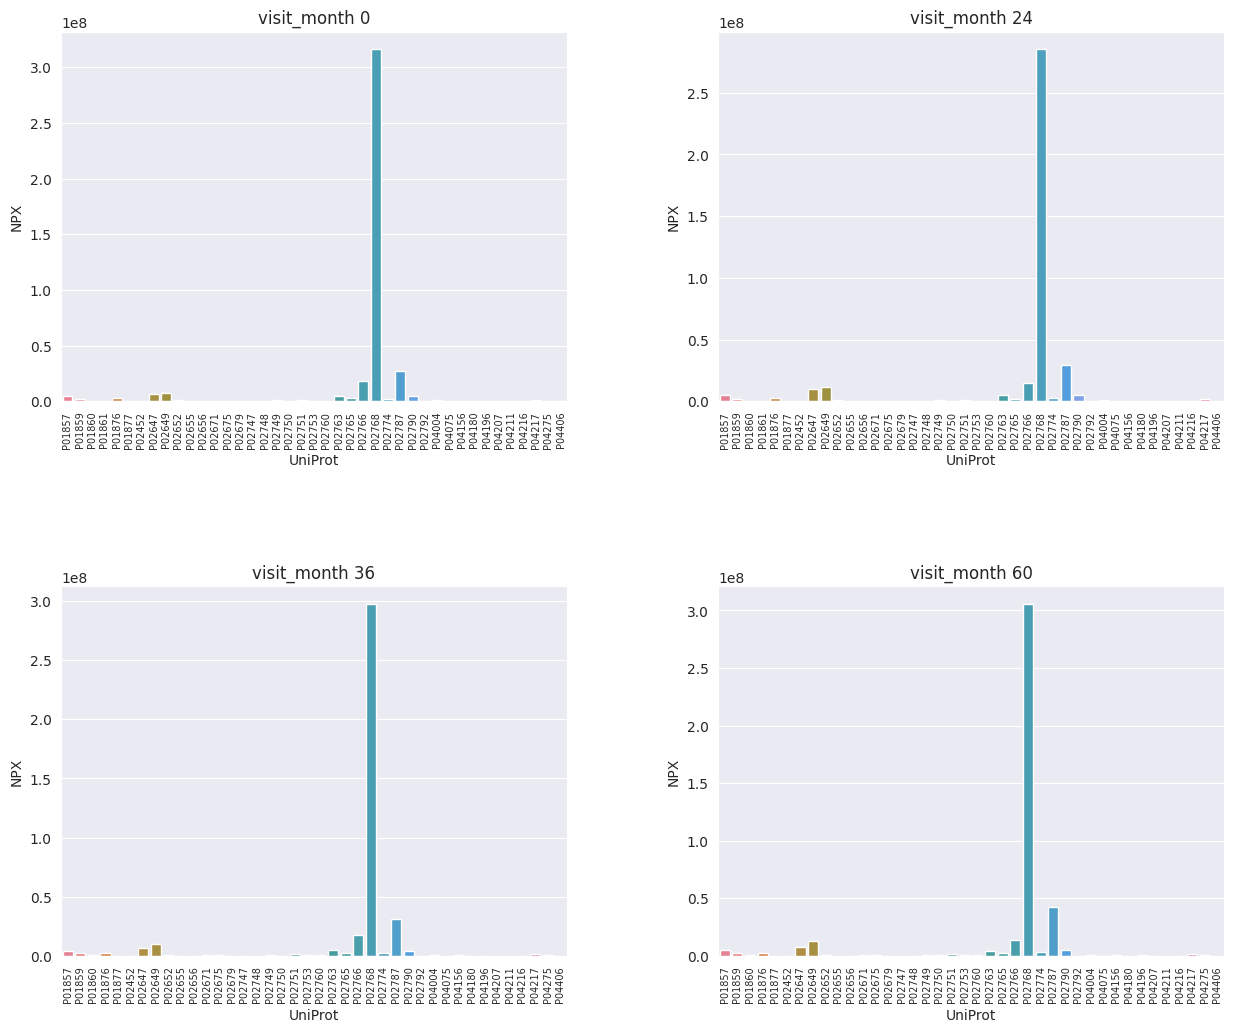

In [ ]:
pro_plot_df = train_proteins[train_proteins["patient_id"]==1517]

protein_list = pro_plot_df['UniProt'].unique()[39:80]
pro_plot_df = pro_plot_df[pro_plot_df['UniProt'].isin(protein_list)]
unique_month = pro_plot_df['visit_month'].unique()
unique_month.sort()
p_len = len(unique_month)

pro_plot_df['visit_month'].unique()
n_rows = math.ceil(p_len/2)
figure, axis = plt.subplots(n_rows, 2, figsize=(15, n_rows*6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, month in enumerate(unique_month):
    row = i//2
    col = i % 2
    plot_df = pro_plot_df[pro_plot_df['visit_month']==month]
    bp = sns.barplot(ax=axis[row, col], x=plot_df['UniProt'], y=plot_df['NPX'], palette='husl')
    #bp.set(xticklabels=[])
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title('visit_month ' + str(month))
plt.show()


<ipython-input-32-03c8c8e2cd9d>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
<ipython-input-32-03c8c8e2cd9d>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
<ipython-input-32-03c8c8e2cd9d>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)
<ipython-input-32-03c8c8e2cd9d>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)


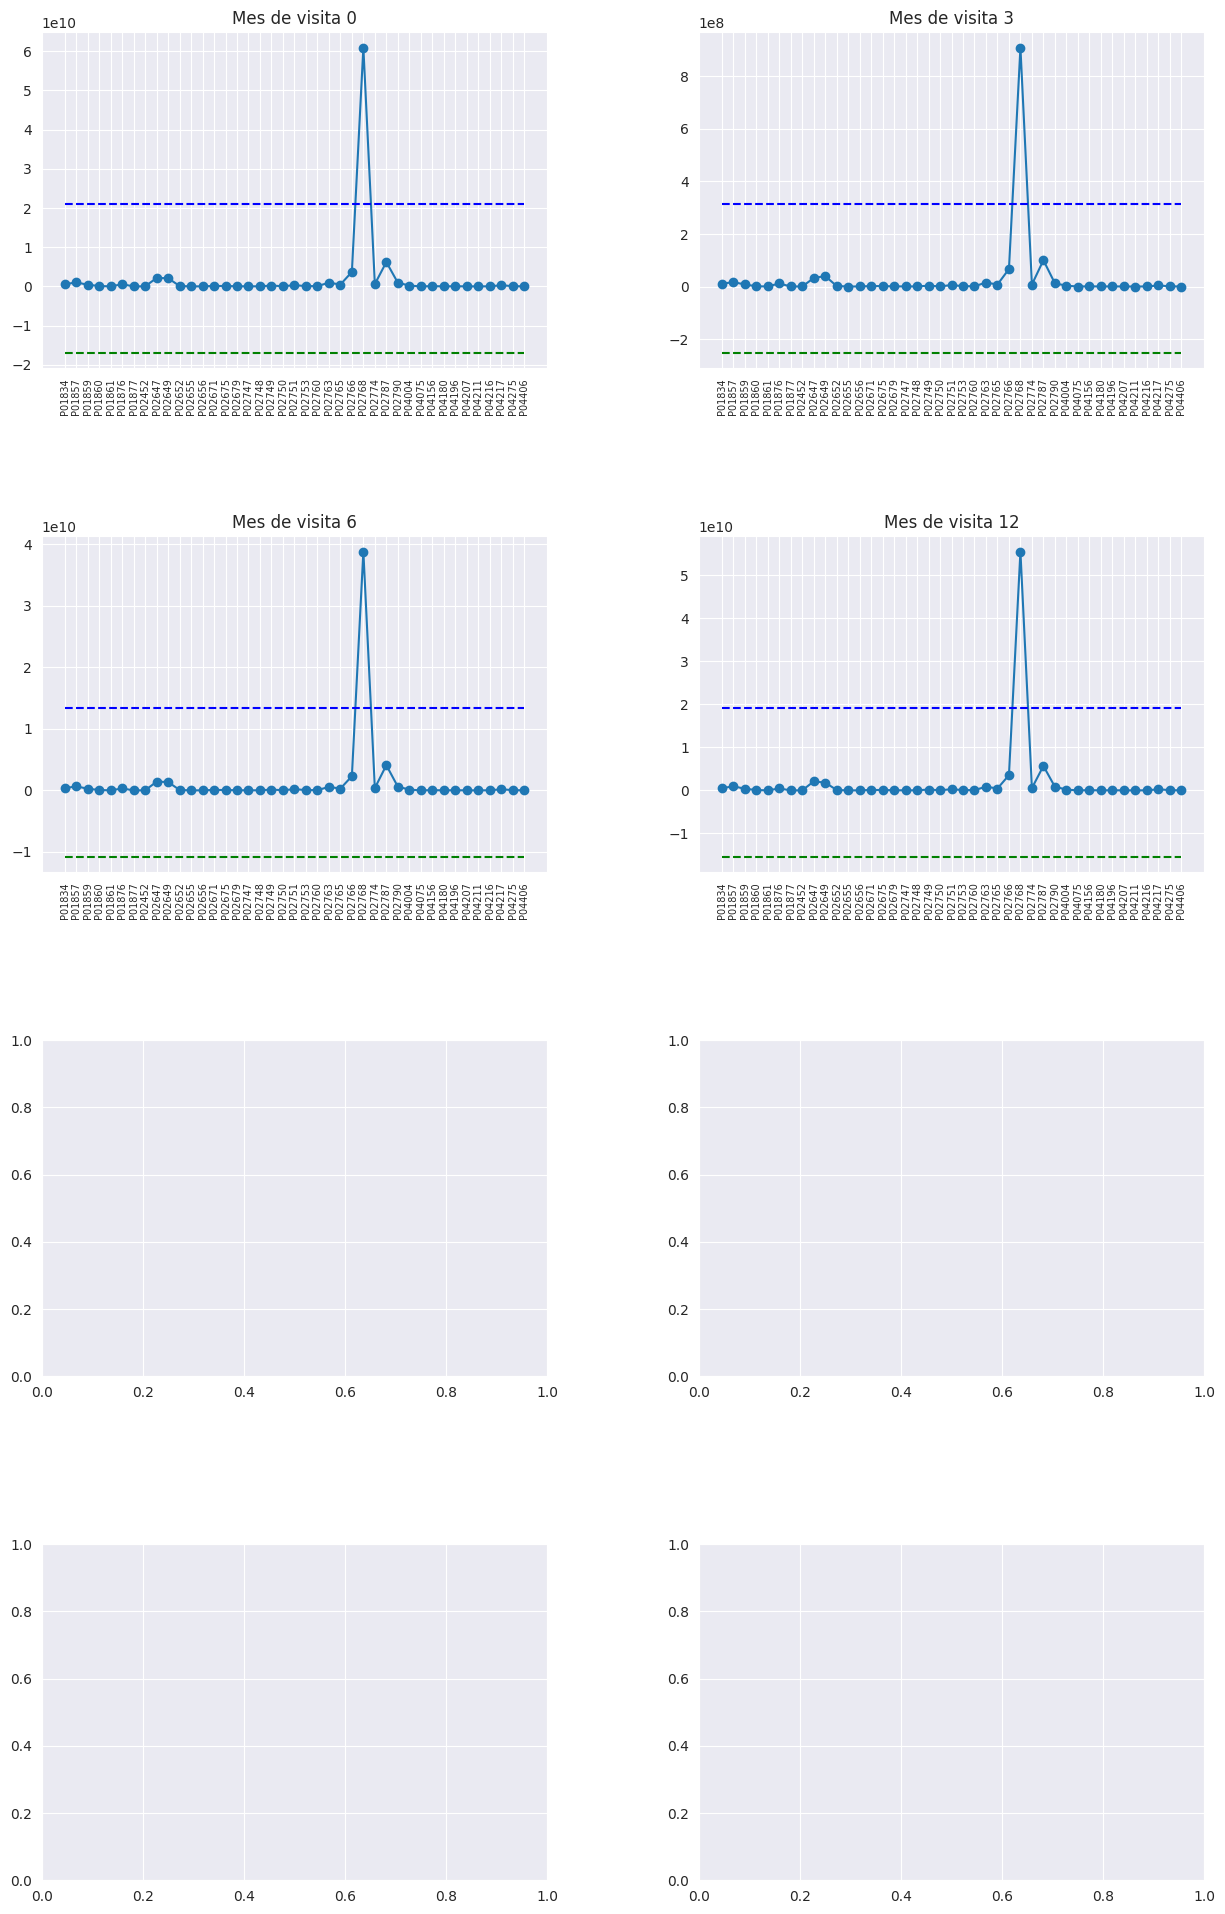

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

protein_list = train_proteins['UniProt'].unique()[39:80]
pro_plot_df = train_proteins[train_proteins['UniProt'].isin(protein_list)]

unique_months = np.sort(pro_plot_df['visit_month'].unique())

selected_months = unique_months[:4]

n_rows = len(selected_months)
n_cols = 2
figure, axis = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, month in enumerate(selected_months):
    row = i // n_cols
    col = i % n_cols
    plot_df = pro_plot_df[pro_plot_df['visit_month'] == month]

    sum_values = plot_df.groupby('UniProt')['NPX'].sum()
    mean_value = sum_values.mean()
    std_value = sum_values.std()

    ax = axis[row, col]

    ax.plot(sum_values.index, sum_values.values, marker='o', label='Suma de NPX')
    ax.plot(sum_values.index, [mean_value - 2 * std_value] * len(sum_values), color='g', linestyle='--', label='-2 Desviaciones Típicas')
    ax.plot(sum_values.index, [mean_value + 2 * std_value] * len(sum_values), color='b', linestyle='--', label='+2 Desviaciones Típicas')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=7)

    ax.set_title(f'Mes de visita {month}')


for i in range(n_rows * n_cols, len(selected_months)):
    axis[i // n_cols, i % n_cols].axis('off')

plt.show()


<ipython-input-21-dad6007ebd40>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prot_plot_df[prot_plot_df['UniProt'] == protein], x='visit_month', y='NPX', palette='husl')
<ipython-input-21-dad6007ebd40>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prot_plot_df[prot_plot_df['UniProt'] == protein], x='visit_month', y='NPX', palette='husl')
<ipython-input-21-dad6007ebd40>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=prot_plot_df[prot_plot_df['UniProt'] == protein], x='visit_month', y='NPX', palette='husl')
<ipython-i

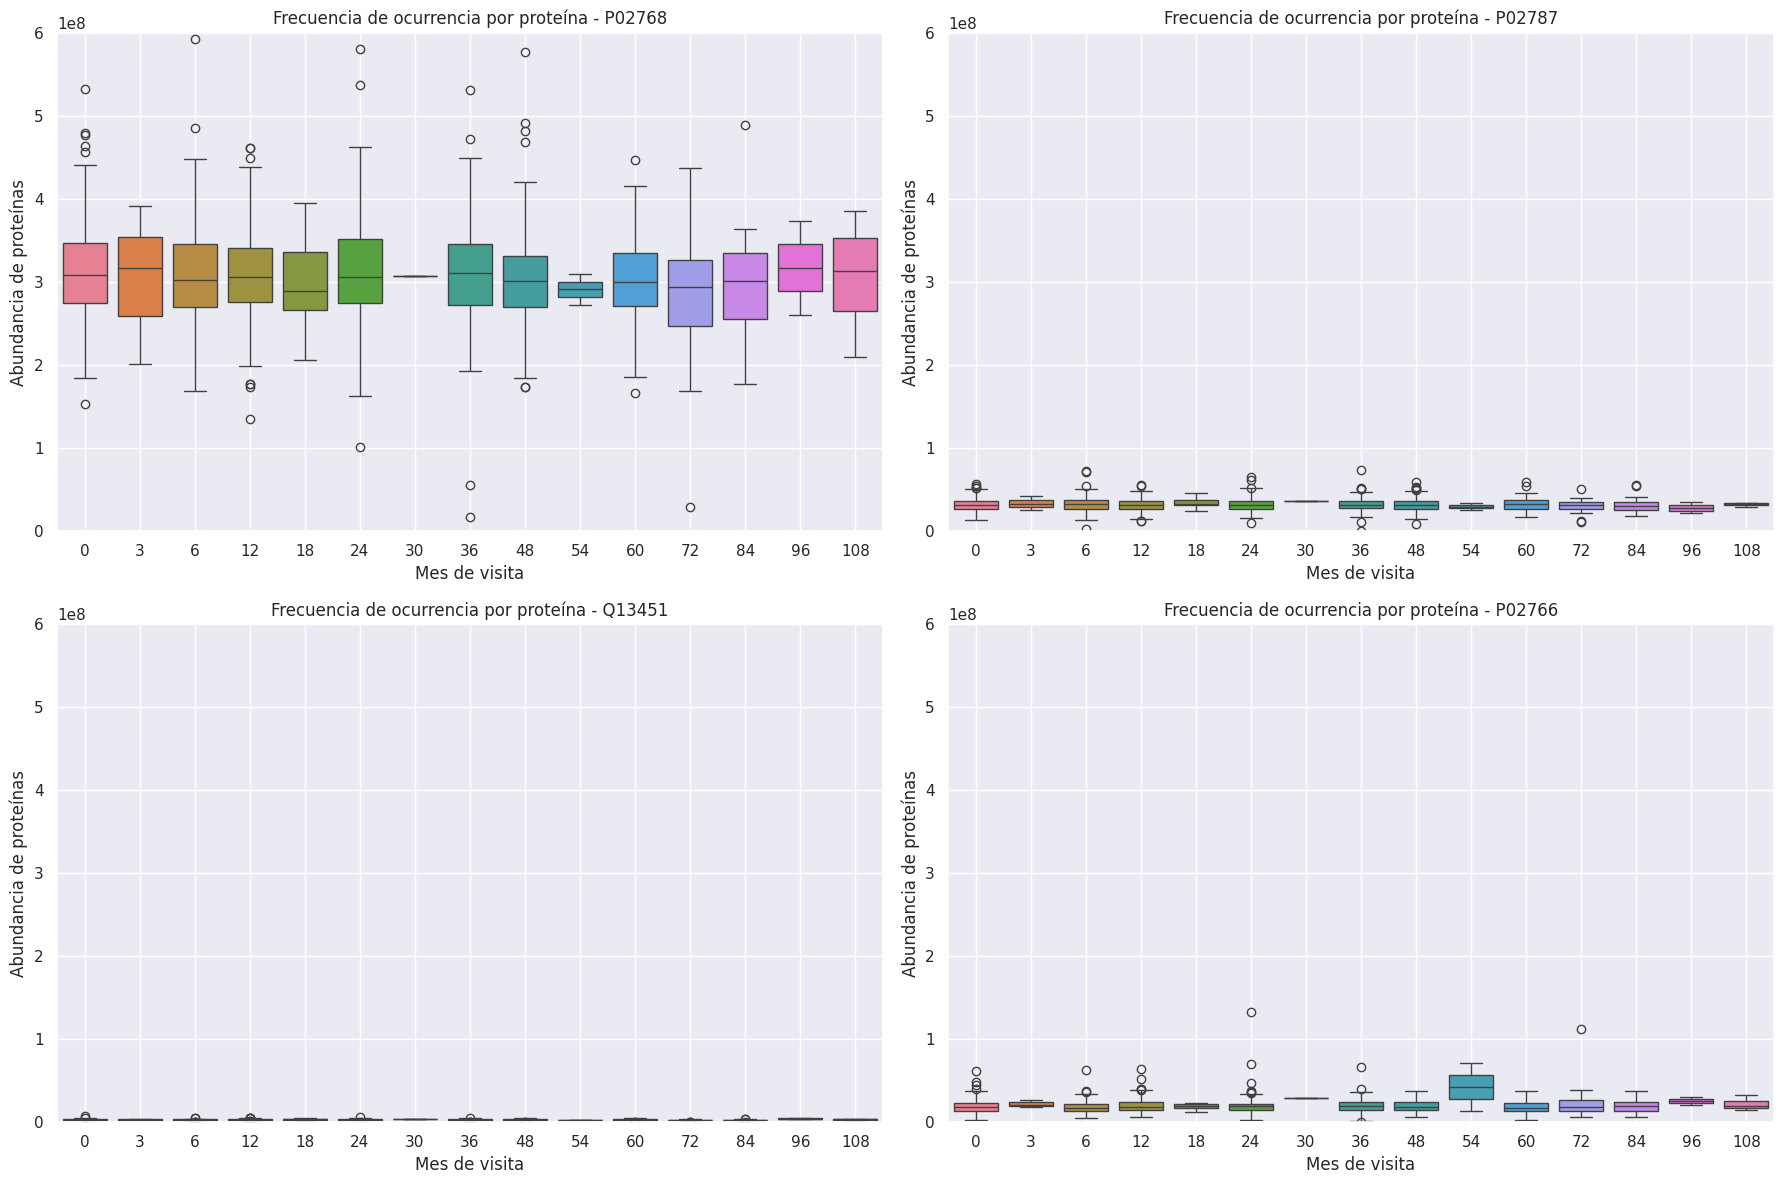

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Lista de proteínas específicas
proteins = ["P02768", "P02787", "Q13451", "P02766"]

# Filtrar el DataFrame por las proteínas específicas
prot_plot_df = train_proteins[train_proteins['UniProt'].isin(proteins)]

# Configuración del estilo del gráfico
sns.set(style="darkgrid")
plt.figure(figsize=(18, 12))

# Crear subplots para cada proteína
for i, protein in enumerate(proteins):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=prot_plot_df[prot_plot_df['UniProt'] == protein], x='visit_month', y='NPX', palette='husl')
    plt.title(f'Frecuencia de ocurrencia por proteína - {protein}')
    plt.xlabel('Mes de visita')
    plt.ylabel('Abundancia de proteínas')
    plt.ylim(0, 6e8)  # Ajustar el límite del eje y
    plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-11-d26a8cd63b6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.boxplot(data=train_protiens_copy, x="visit_month", y="log_NPX", palette="husl", ax=ax)
<ipython-input-11-d26a8cd63b6b>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  _ = sns.pointplot(data=train_protiens_copy, x="visit_month", y="log_NPX", color="r", ci=None, ax=ax)


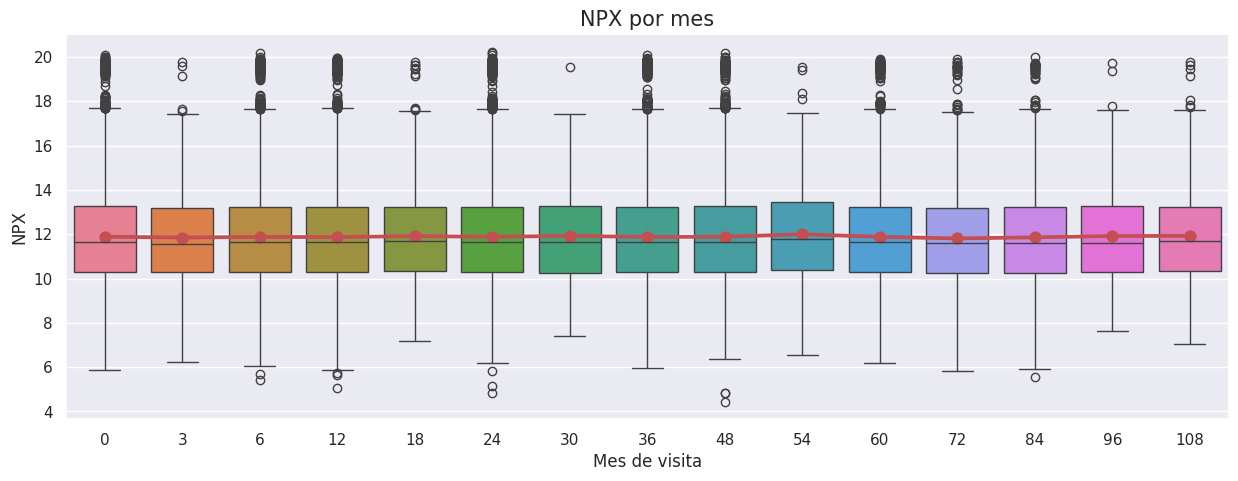

In [ ]:
train_protiens_copy = train_proteins.copy()
train_protiens_copy["log_NPX"] = np.log(train_protiens_copy["NPX"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_protiens_copy, x="visit_month", y="log_NPX", palette="husl", ax=ax)
_ = sns.pointplot(data=train_protiens_copy, x="visit_month", y="log_NPX", color="r", ci=None, ax=ax)
_ = ax.set_title("NPX por mes", fontsize=15)
_ = ax.set_xlabel("Mes de visita")
_ = ax.set_ylabel("NPX")

In [ ]:
proteins = []
protein_dict = {}
for index, row in train_proteins.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]

peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide_dep"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]

train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])

for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])

<ipython-input-13-ba7b7a1b3132>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
<ipython-input-13-ba7b7a1b3132>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
<ipython-input-13-ba7b7a1b3132>:21: PerformanceWarning: DataFrame is hig

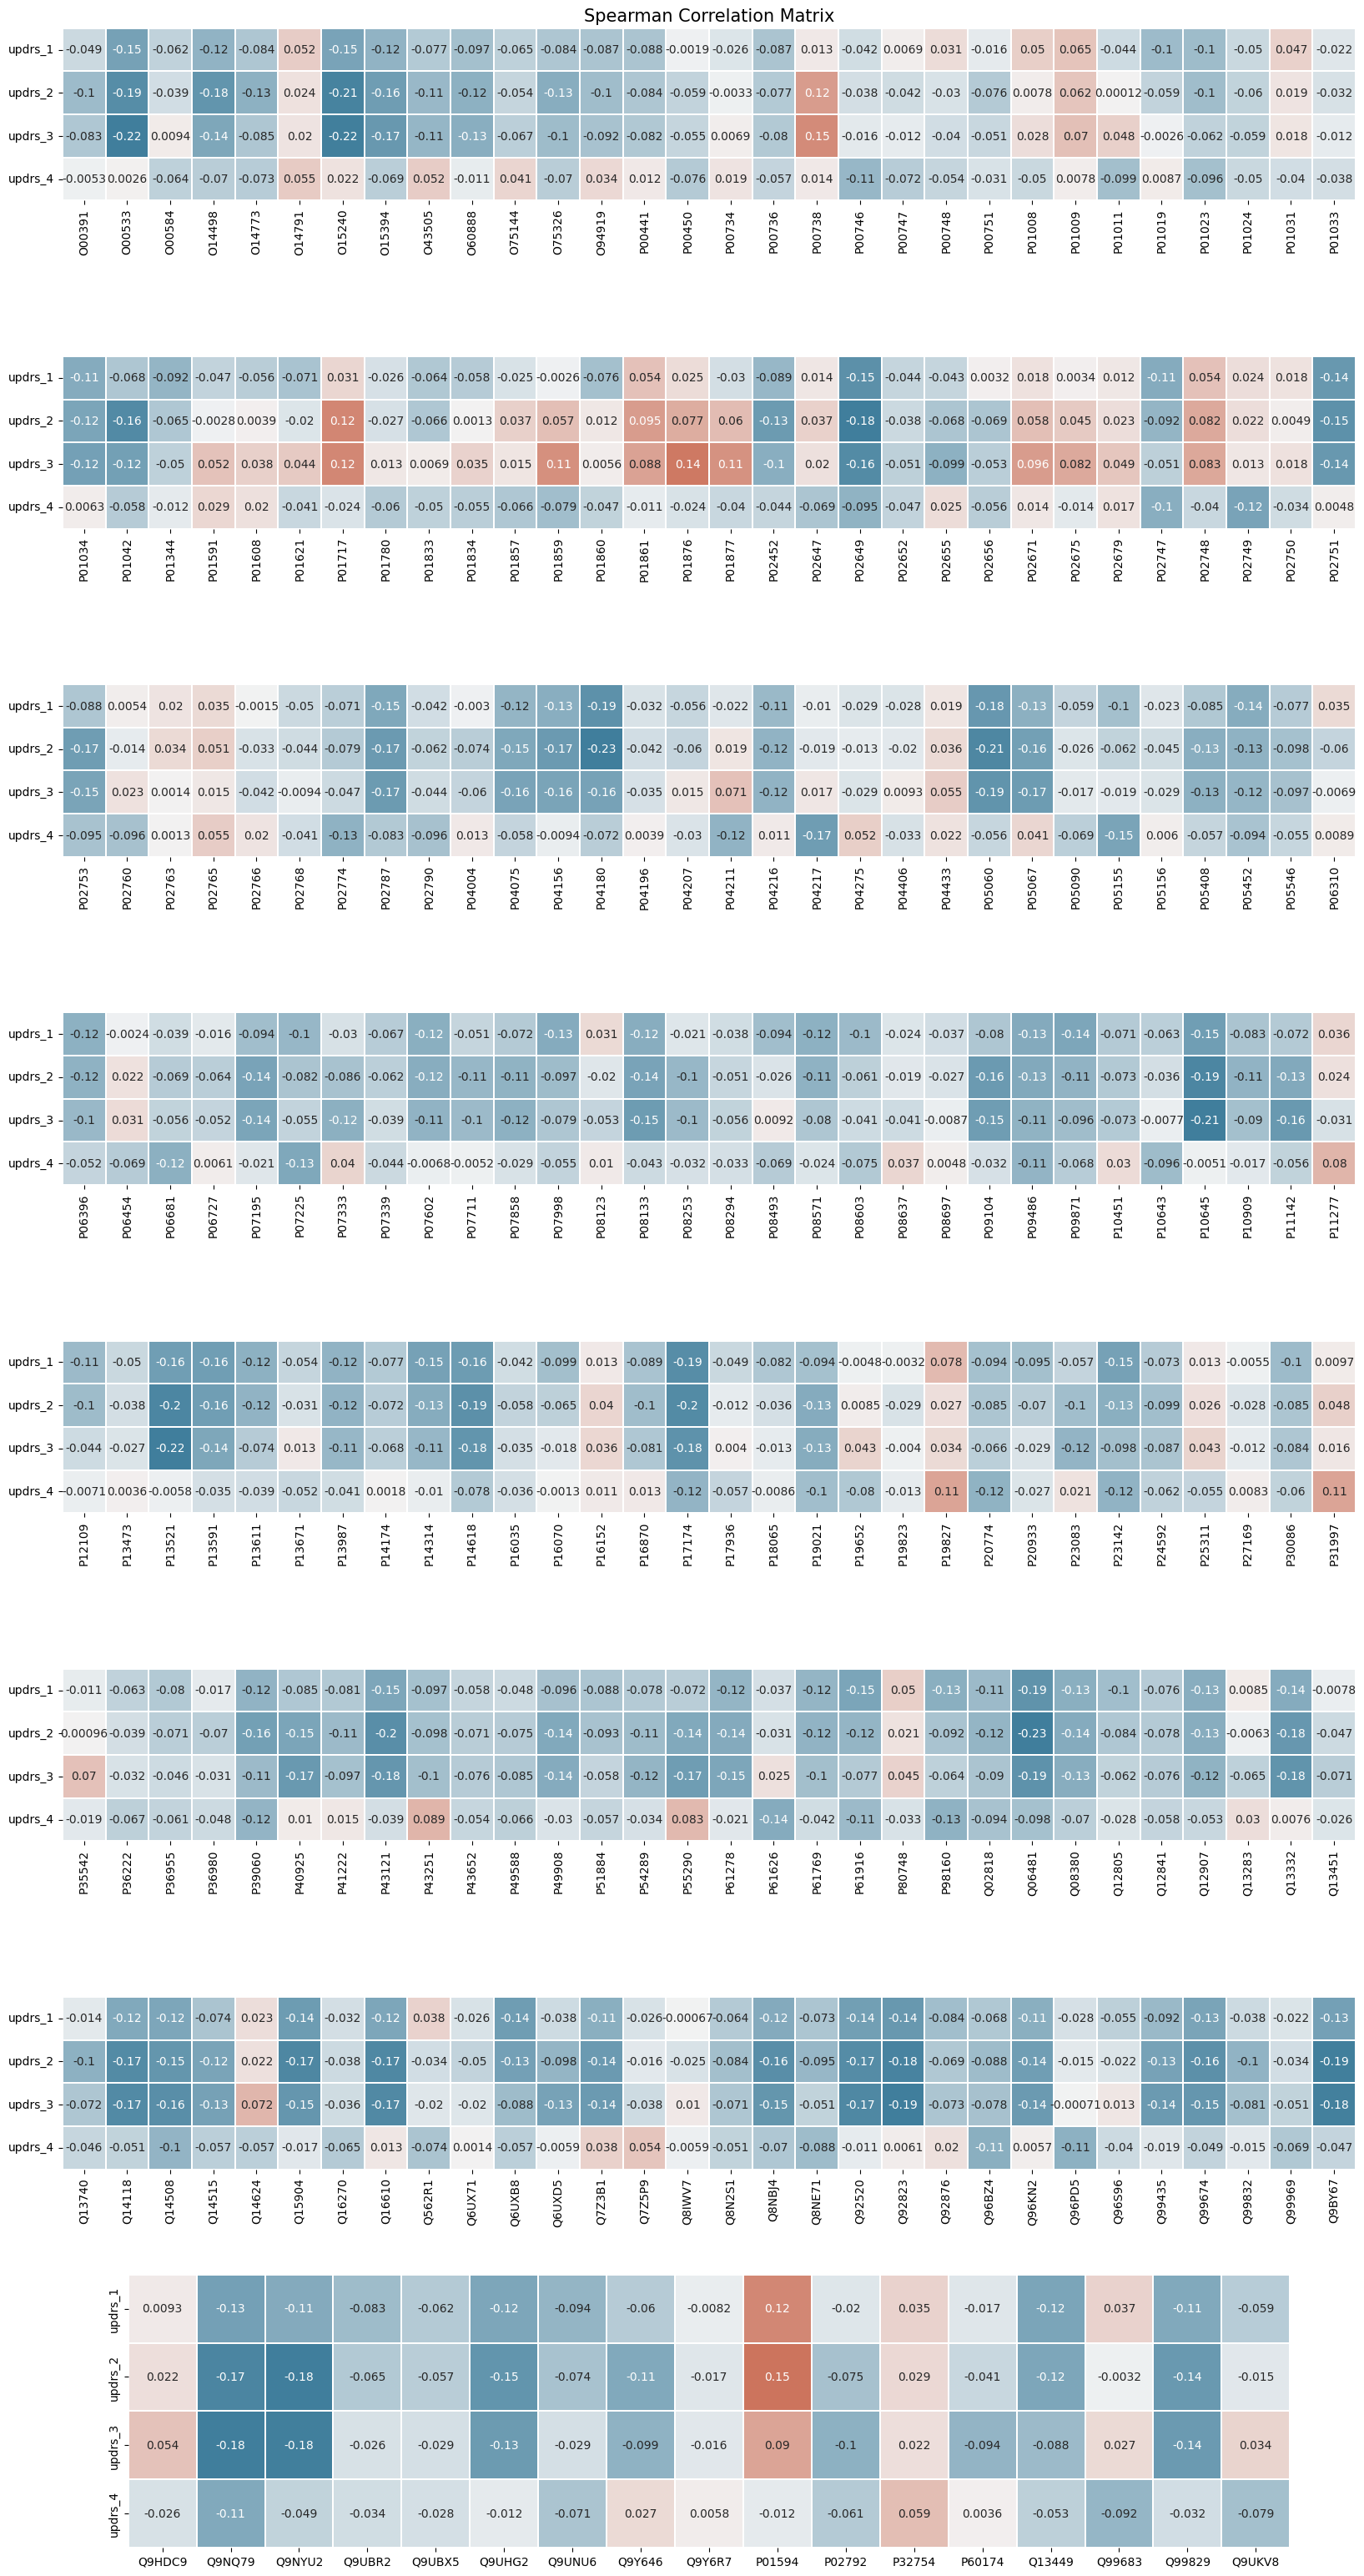

In [ ]:
features = []
features.extend(proteins)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)

# Data analysis

- Replicar y enriquecer el procesado y descriptivo de los datos en [gusthema](https://www.kaggle.com/code/gusthema/parkinson-s-disease-progression-prediction-w-tfdf):
  - Procesado de datos para construir una única bd
  - Construye un modelo de serie temporalpor cada updrs

- Replicar y enriquecer el modelado y comparación con diferentes modelos de [lokeshparab](https://www.kaggle.com/code/lokeshparab/parkinsons-disease-analysis):
  - Partición de muestras con train_test_split
  - comparación de varios modelos con MSE
  - Un modelo por cada updrs

- Estudiar/seleccionar los modelos en [lokeshparab](https://www.kaggle.com/code/lokeshparab/parkinsons-disease-analysis) para documentarlos en la metodología. Basta con seleccionar varios modelos a describir, ajustar y comparar (los que más te gusten).

          "Linear Regression"               : LinearRegression(),
          "Lasso"                           : Lasso(),
            "Ridge"                           : Ridge(),
            "K-Neighbors Regressor"           : KNeighborsRegressor(),
            "Decision Tree"                   : DecisionTreeRegressor(),
            "Random Forest Regressor"         : RandomForestRegressor(),
            "CatBoosting Regressor"           : CatBoostRegressor(verbose=False),

Unión de las bases de datos en una sola con tantas columnas como proteínas y además tantas columnas como péptidos, para cada visit_id.
Cada registro (fila) contiene toda la información del paciente en esa visita (NFX de las correspondientes Uniprot y PeptideAbundance) de cada peptide. Ver [gusthema](https://www.kaggle.com/code/gusthema/parkinson-s-disease-progression-prediction-w-tfdf).

In [ ]:
# obtenido de gusthema. Ver explicación sobre el combinado de datos
# Function to prepare dataset with all the steps mentioned above:
def prepare_dataset(train_proteins, train_peptides):
    # Step 1: Grouping
    df_protein_grouped = train_proteins.groupby(['visit_id','UniProt'])['NPX'].mean().reset_index()
    df_peptide_grouped = train_peptides.groupby(['visit_id','Peptide_dep'])['PeptideAbundance'].mean().reset_index()

    # Step 2: Pivoting
    df_protein = df_protein_grouped.pivot(index='visit_id',columns = 'UniProt', values = 'NPX').rename_axis(columns=None).reset_index()
    df_peptide = df_peptide_grouped.pivot(index='visit_id',columns = 'Peptide_dep', values = 'PeptideAbundance').rename_axis(columns=None).reset_index()

    # Step 3: Merging
    #pro_pep_df = df_protein.merge(df_peptide, on = ['visit_id'], how = 'left')
    pro_pep_df = df_protein.merge(df_peptide, on = ['visit_id'], how = 'left')


    return pro_pep_df

In [ ]:
pro_pep_df=prepare_dataset(train_proteins, train_peptides)

In [ ]:
pro_pep_df.shape

(1113, 1196)

In [ ]:
# Display the first 5 examples
pro_pep_df.head(5)

visit_id    O00391    O00533   O00584   O14498    O14773   O14791  \
0   10053_0   9104.27  402321.0      NaN      NaN   7150.57  2497.84   
1  10053_12  10464.20  435586.0      NaN      NaN       NaN      NaN   
2  10053_18  13235.70  507386.0  7126.96  24525.7       NaN  2372.71   
3  10138_12  12600.20  494581.0  9165.06  27193.5  22506.10  6015.90   
4  10138_24  12003.20  522138.0  4498.51  17189.8  29112.40  2665.15   

     O15240   O15394    O43505  ...  YSLTYIYTGLSK  YTTEIIK  YVGGQEHFAHLLILR  \
0   83002.9  15113.6  167327.0  ...      202274.0      NaN        4401830.0   
1  197117.0  15099.1  164268.0  ...      201009.0      NaN        5001750.0   
2  126506.0  16289.6  168107.0  ...      220728.0      NaN        5424380.0   
3  156313.0  54546.4  204013.0  ...      188362.0  9433.71        3900280.0   
4  151169.0  52338.1  240892.0  ...      206187.0  6365.15        3521800.0   

   YVMLPVADQDQCaIR  YVMbLPVADQDQCaIR  YVNKEIQNAVNGVK  YWGVASFLQK  \
0         583075.0           77482.6         76705.7    104260.0   
1         355643.0           36745.3         92078.1    123254.0   
2         496021.0           39016.0         63203.6    128336.0   
3         328482.0           48210.3         89822.1    129964.0   
4         496737.0           69984.6         80919.3    111799.0   

   YYCaFQGNQFLR  YYTYLIMNK  YYWGGQYTWDMAK  
0      530223.0        NaN        7207.30  
1      453883.0    49281.9       25332.80  
2      447505.0    52389.1       21235.70  
3      552232.0    65657.8        9876.98  
4           NaN    56977.6        4903.09  

[5 rows x 1196 columns]

In [ ]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [ ]:
#scoring metric for this competition
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
# Create an empty dictionary to store the models trained for each label.
model_dict = {}

# Create an empty dictionary to store the mse score of the models trained for each label.
mse_dict = {}

# Create an empty dictionary to store the sMAPE scores of the models trained for each label.
smape_dict = {}

In [ ]:
FEATURES = [i for i in pro_pep_df.columns if i not in ["visit_id"]]
FEATURES.append("visit_month")

In [ ]:
# List of target labels to loop through and train models
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

# Loop through each label
for label in target:

    # Merge the label 'visit_id', 'patient_id', 'visit_month' and label columns from `train_clinical`
    # data frame to `pro_prep_df` data frame on the `visit_id` column.
    dataset_df = pro_pep_df.merge(train_clinical_data[['visit_id', 'patient_id', 'visit_month', label]], on = ['visit_id'], how = 'left')

    # Drop null value label rows

    dataset_df = dataset_df.dropna(subset=[label])

    # Make a new copy of the FEATURES list we created previously. Add `label` to it.
    feature_list = FEATURES.copy()
    feature_list.append(label)

    # Split the dataset into train and validation datasets.
    train_df, valid_df = split_dataset(dataset_df[feature_list])
    print("{} examples in training, {} examples in testing.".format(len(train_df), len(valid_df)))
     # There's one more step required before we can train the model.
    # We need to convert the datatset from Pandas format (pd.DataFrame)
    # into TensorFlow Datasets format (tf.data.Dataset).
    # TensorFlow Datasets is a high performance data loading library
    # which is helpful when training neural networks with accelerators like GPUs and TPUs.
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label, task = tfdf.keras.Task.REGRESSION)
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label, task = tfdf.keras.Task.REGRESSION)
      # We will now create the Random Forest Tree Model with default settings.
    # By default the model is set to train for a classification task. Since this is a regression problem,
    # we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here.
    rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION, verbose=0)
    rf.compile(metrics=["mse"])

    # Train the model.
    rf.fit(x=train_ds)
    # Store the model
    model_dict[label] = rf

    # Evaluate the trained model on the validation dataset and store the
    # mse value in the `mse_dict`.
    inspector = rf.make_inspector()
    inspector.evaluation()
    evaluation = rf.evaluate(x=valid_ds,return_dict=True)
    mse_dict[label] = evaluation["mse"]

    # Use the trained model to make predictions on the validation dataset.
    # Using these predictions, calculate and store the sMAPE value for this model.
    preds = rf.predict(valid_ds)
    smape_dict[label] = smape(valid_df[label].values.tolist(), preds.flatten())

860 examples in training, 208 examples in testing.
1/1 [==============================] - 3s 3s/step
849 examples in training, 219 examples in testing.
1/1 [==============================] - 2s 2s/step
861 examples in training, 197 examples in testing.


1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - mse: 157.1209


1/1 [==============================] - 2s 2s/step
466 examples in training, 103 examples in testing.
1/1 [==============================] - 2s 2s/step


In [ ]:
for name, value in smape_dict.items():
  print(f"label {name}: sMAPE {value:.4f}")

print("\nAverage sMAPE", sum(smape_dict.values())/4)

label updrs_1: sMAPE 62.1173
label updrs_2: sMAPE 93.2701
label updrs_3: sMAPE 82.6539
label updrs_4: sMAPE 142.6577

Average sMAPE 95.17473530265777


In [ ]:
#lokeshparb
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.2 MB/s eta 0:00:00


In [ ]:

from sklearn.metrics import ( mean_squared_error , mean_absolute_error , r2_score)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from sklearn.pipeline            import Pipeline
from sklearn.feature_selection   import SelectKBest, f_regression

from sklearn.preprocessing       import StandardScaler
from sklearn.compose             import TransformedTargetRegressor
from sklearn.ensemble            import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree                import DecisionTreeRegressor
from sklearn.neighbors           import KNeighborsRegressor
from sklearn.linear_model        import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.linear_model        import TheilSenRegressor, HuberRegressor
from sklearn.svm                 import SVR
from sklearn.kernel_ridge        import KernelRidge
from sklearn.neural_network      import MLPRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, DotProduct, Matern, RationalQuadratic, ExpSineSquared

from sklearn.model_selection     import GridSearchCV


from xgboost  import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
df_peptides=train_peptides
df_proteins=train_proteins
df_clinical=train_clinical_data
list_peptides = list(set(df_peptides['Peptide_dep']))
list_proteins = list(set(df_proteins['UniProt']))

In [ ]:
class OneHotEncoding:

    def __init__(self, output_column_name, df_clinical, df_peptides, df_proteins, list_peptides, list_proteins):
        self.output_column = output_column_name
        self.df_clinical = df_clinical[['visit_id', 'patient_id', 'visit_month', output_column_name]].dropna()
        self.df_peptides = df_peptides.drop(['patient_id', 'visit_month', "UniProt"], axis=1)
        self.df_proteins = df_proteins.drop(['patient_id', 'visit_month'], axis=1)
        self.peptides = list_peptides
        self.proteins = list_proteins

        columns = list(self.df_clinical.columns) + self.peptides + self.proteins
        self.data_dict = {column: [] for column in columns}

        self.peptides_set = set(self.df_peptides['Peptide_dep'])
        self.proteins_set = set(self.df_proteins['UniProt'])

    def get_data_by_visit_id(self, visit_id):
        patient_peptide_details = self.df_peptides[self.df_peptides["visit_id"] == visit_id][['Peptide_dep', 'PeptideAbundance']]
        patient_proteins_details = self.df_proteins[self.df_proteins["visit_id"] == visit_id][['UniProt', 'NPX']]
        return patient_peptide_details, patient_proteins_details

    def encoding_by_inputs(self, global_names, patient_data, names, values):
        for name in global_names:
            value = patient_data.get(name, 0)
            self.data_dict[name].append(value)

    def main(self):
        for visit_id, patient_id, visit_month, output_column in self.df_clinical.values:
            patient_peptide_details, patient_proteins_details = self.get_data_by_visit_id(visit_id)

            if not patient_peptide_details.empty and not patient_proteins_details.empty:
                peptide_data_dict = dict(zip(patient_peptide_details['Peptide_dep'], patient_peptide_details['PeptideAbundance']))
                protein_data_dict = dict(zip(patient_proteins_details['UniProt'], patient_proteins_details['NPX']))

                self.encoding_by_inputs(self.peptides_set, peptide_data_dict, 'Peptide_dep', 'PeptideAbundance')
                self.encoding_by_inputs(self.proteins_set, protein_data_dict, 'UniProt', 'NPX')

                self.data_dict['visit_id'].append(visit_id)
                self.data_dict['patient_id'].append(patient_id)
                self.data_dict['visit_month'].append(visit_month)
                self.data_dict[self.output_column].append(output_column)

    def get_dataframe(self):
        return pd.DataFrame(self.data_dict)


In [ ]:
updrs_1 = OneHotEncoding('updrs_1', df_clinical, df_peptides, df_proteins, list_peptides, list_proteins)
updrs_1.main()
updrs_1 = updrs_1.get_dataframe()

updrs_2 = OneHotEncoding('updrs_2', df_clinical, df_peptides, df_proteins, list_peptides, list_proteins)
updrs_2.main()
updrs_2 = updrs_2.get_dataframe()

updrs_3 = OneHotEncoding('updrs_3', df_clinical, df_peptides, df_proteins, list_peptides, list_proteins)
updrs_3.main()
updrs_3 = updrs_3.get_dataframe()

updrs_4 = OneHotEncoding('updrs_4', df_clinical, df_peptides, df_proteins, list_peptides, list_proteins)
updrs_4.main()
updrs_4 = updrs_4.get_dataframe()

KeyboardInterrupt: 

In [ ]:
updrs_2 = OneHotEncoding('updrs_2', df_clinical, df_peptides, df_proteins, list_peptides, list_proteins)
updrs_2.main()
updrs_2 = updrs_2.get_dataframe()

In [ ]:
class Model_Training:
    def __init__(self, updrs, name ):

        X = updrs.drop(['visit_id','patient_id', name ], axis = 1)
        y = updrs[name]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self.final_models = {
            'name':[],
            'model':[],
            'root_mean_sqr':[],
            'absolute_mean':[],
            'r2_score':[]
        }

        models = {
            "Linear Regression"               : LinearRegression(),
            "Lasso"                           : Lasso(),
            "Ridge"                           : Ridge(),
            "K-Neighbors Regressor"           : KNeighborsRegressor(),
            "Decision Tree"                   : DecisionTreeRegressor(),
            "Random Forest Regressor"         : RandomForestRegressor(),
            #"XGBRegressor"                    : XGBRegressor(),
            "CatBoosting Regressor"           : CatBoostRegressor(verbose=False),
            #"AdaBoost Regressor"              : AdaBoostRegressor(),
            #"Support Vector Regression"       : SVR(),
            #"Gradient Boosting Regressor"     : GradientBoostingRegressor(),
            #"ElasticNet Regressor"            : ElasticNet(),
            #"Bayesian Ridge Regression"       : BayesianRidge(),
            #"Kernel Ridge Regression"         : KernelRidge(),
            #"Multi-layer Perceptron Regressor": MLPRegressor(),
            #"Gaussian Process Regressor"      : GaussianProcessRegressor(),
            #"Theil-Sen Regressor"             : TheilSenRegressor(),
            #"Huber Regressor"                 : HuberRegressor(),
        }

        # Set up the pipeline for each model
        self.pipelines = {}
        for model_name, model in models.items():
            if model_name == "XGBRegressor":
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('feature_selection', SelectKBest(f_regression)),
                    ('model', TransformedTargetRegressor(regressor=model))
                ])
            else:
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('feature_selection', SelectKBest(f_regression)),
                    ('model', model)
                ])

            # Set up hyperparameter tuning
            if model_name == "Linear Regression":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20]
                }
            elif model_name == "Lasso":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__alpha': [0.1, 1, 10, 100]
                }
            elif model_name == "Ridge":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__alpha': [0.1, 1, 10, 100]
                }
            elif model_name == "K-Neighbors Regressor":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__n_neighbors': [5, 10, 15, 20]
                }
            elif model_name == "Decision Tree":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__max_depth': [5, 10, 15, 20]
                }
            elif model_name == "Random Forest Regressor":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__n_estimators': [100, 200, 300, 400]
                }
            elif model_name == "XGBRegressor":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__regressor__learning_rate': [0.01, 0.1, 0.5, 1],
                    'model__regressor__max_depth': [3, 5, 7, 9],
                    'model__regressor__n_estimators': [100, 200, 300, 400]
                }
            elif model_name == "CatBoosting Regressor":
                param_grid = {
                    'feature_selection__k': [5, 10, 15, 20],
                    'model__learning_rate': [0.01, 0.1, 0.5, 1],
                    'model__depth': [3, 5, 7, 9],
                    'model__n_estimators': [100, 200, 300, 400]
                    }
            # Set up grid search with cross-validation
            grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error' )

            # Fit the model

            # Store the model pipeline and grid search in a dictionary
            self.pipelines[model_name] = grid_search

    def evaluate_model(self,predicted):

        mae = mean_absolute_error(self.y_test, predicted)
        #mse = mean_squared_error(true, predicted)
        rmse = np.sqrt(mean_squared_error(self.y_test, predicted))
        r2_square = r2_score(self.y_test, predicted)
        return mae, rmse, r2_square


    def fit(self):
        for model_name, pipeline in tqdm(self.pipelines.items()):
            # Fit the pipeline to the training data
            pipeline.fit(self.X_train, self.y_train)

            # Predict the target variable for the testing data
            best_model = pipeline.best_estimator_
            y_pred = best_model.predict(self.X_test)

            # Calculate the root mean squared error (RMSE) of the predictions
            model_test_mae , model_test_rmse, model_test_r2 = self.evaluate_model(y_pred)

            # Fetching in final data list
            self.final_models['name'         ].append(model_name)
            self.final_models['model'        ].append(best_model)
            self.final_models['root_mean_sqr'].append(model_test_rmse)
            self.final_models['absolute_mean'].append(model_test_mae)
            self.final_models['r2_score'     ].append(model_test_r2)


    def final_models_list(self):

        return pd.DataFrame(self.final_models).sort_values('r2_score',ascending = False)

    def best_model(self):

        return self.final_models_list().values[0][1]


In [ ]:
updrs_1_model = Model_Training(updrs_1,'updrs_1')
updrs_1_model.fit()

updrs_1_best_model = updrs_1_model.best_model()

updrs_1_model.final_models_list()

  0%|          | 0/7 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
updrs_2_model = Model_Training(updrs_2,'updrs_2')
updrs_2_model.fit()

updrs_2_best_model = updrs_2_model.best_model()

updrs_2_model.final_models_list()

In [ ]:
updrs_3_model = Model_Training(updrs_3,'updrs_3')
updrs_3_model.fit()

updrs_3_best_model = updrs_3_model.best_model()

updrs_3_model.final_models_list()

In [ ]:
updrs_4_model = Model_Training(updrs_4,'updrs_4')
updrs_4_model.fit()

updrs_4_best_model = updrs_4_model.best_model()

updrs_4_model.final_models_list()